<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* IsActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
    - 0 = No ( Customer did not leave the bank )
    - 1 = Yes ( Customer left the bank )

## **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [35]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

**Note:** After running the above cell, please restart the notebook kernel/runtime (depending on whether you're using Jupyter Notebook or Google Colab) and then sequentially run all cells from the one below.

In [86]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [37]:
# uncomment and run the following lines in case Colab is being used
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:

bank = '/content/drive/MyDrive/bank-1.csv'
ds = pd.read_csv(bank)    # complete the code to load the dataset

## Data Overview

### View the first and last 5 rows of the dataset.

In [ ]:
# let's view the first 5 rows of the data
ds.head() ##  Complete the code to view top 5 rows of the data



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**My observation**


*   Head function retrun first rows from the datasheet



In [ ]:
# let's view the last 5 rows of the data
ds.tail() ##  Complete the code to view last 5 rows of the data


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


**My observation**


*   tail function retrun first rows from the datasheet

### Understand the shape of the dataset

In [ ]:
# Checking the number of rows and columns in the training data
ds.shape ##  Complete the code to view dimensions of the train data


(10000, 12)

**My observation**


*   There  are ten housand rows bank chrun datasheet
*   There  are fourteen columns in bank chrun datasheet



### Check the data types of the columns for the dataset

In [39]:
#Check the data types of the columns for the dataset
ds.dtypes


,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


### Checking the Statistical Summary

In [ ]:
#ds.describe().T
ds.describe(include='all')

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


**My Observations:**

**Binary Features**
*   HasCrCard 0.705,  ~70.5% have credit cards.
*   IsActiveMember 0.515, Roughly 50% are active—important to investigate impact on churn.
*   Exited 0.204, ~20.4% of customers have churned. This is a class imbalance issue—you may need resampling strategies.

**Categorical Variables**

*   Geography_Germany	0.2509	~25% of customers are from Germany
*   Geography_Spain	0.2477	~25% from Spain
*   Gender_Male	0.5457	~54.6% male customers

# **Key Insights**

**1. Churn Rate is Low (20.4%):**

*   Churn Rate is Low (20.4%)
*   Indicates class imbalance—neural networks might need class weighting or oversampling (SMOTE, etc.).

**2. Balance Shows Bimodality**

25% of customers have zero balance, while the rest range quite high. Zero balance customers could indicate disengagement.

**3. Activity is Key:**

IsActiveMember is very likely to correlate with Exited.

**4. Age Factor:**

Churn might increase with age; older customers could be less sticky.

**5. Multicollinearity Risk:**

Watch out for dummy variables (Geography) and binary variables causing redundancy in model input.

**6. Product Usage:**

Number of products may inversely relate to churn—engaged users typically use more services.

### Checking for Missing Values

In [40]:
# let's check for missing values in the data
ds.isnull().sum()



,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


**My Observation:**

*   There are no NULL records in given datasheet

### Checking for unique values for each of the column

In [ ]:
ds.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


## Exploratory Data Analysis

### Univariate Analysis

In [87]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [88]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

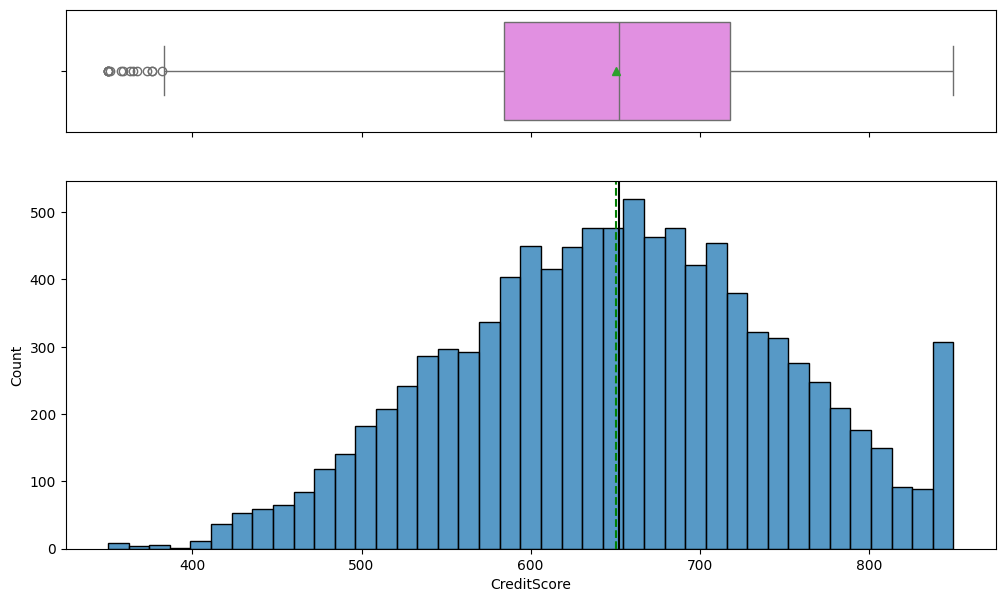

In [ ]:
histogram_boxplot(ds,'CreditScore')

**My Observations:**

**Boxplot (Top Panel) Observations**
The box (interquartile range) spans roughly from ~584 to ~718, matching the 25th and 75th percentiles.

**The median** (black line in the box) is very close to the mean (green triangle), suggesting a fairly symmetric distribution.

**A few outliers** are visible on the left (low-end) below ~400. These are statistical outliers but still within acceptable credit score ranges.

**No high-end outliers**, which implies upper credit scores are evenly spread and well within range.

#### Observations on Age

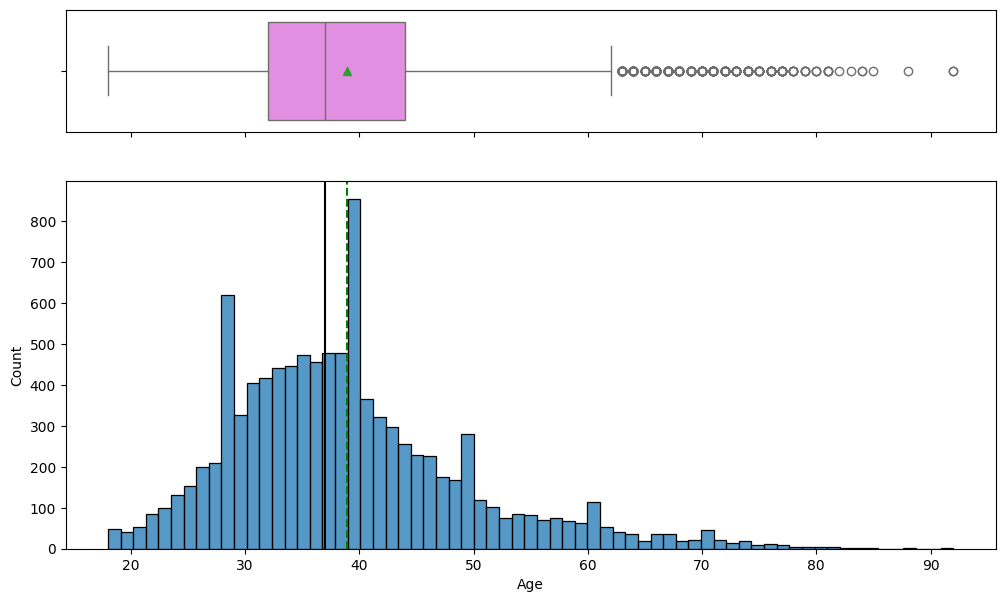

In [ ]:
## Complete the code to create histogram_boxplot for Age
histogram_boxplot(ds,'Age')


**My Observations:**

*   The box (IQR) spans approximately from 32 to 44, which matches the 25th to 75th percentiles in your descriptive stats.

*   The median is just below 40, and the mean (green triangle) is almost aligned — indicating a slight right skew.

*   There are numerous outliers beyond the upper whisker (i.e., above ~60 years). These are expected given that age extends up to 92.

*   These are legitimate values, not data errors, so no need to remove them — but they do represent a small minority.

#### Observations on Balance

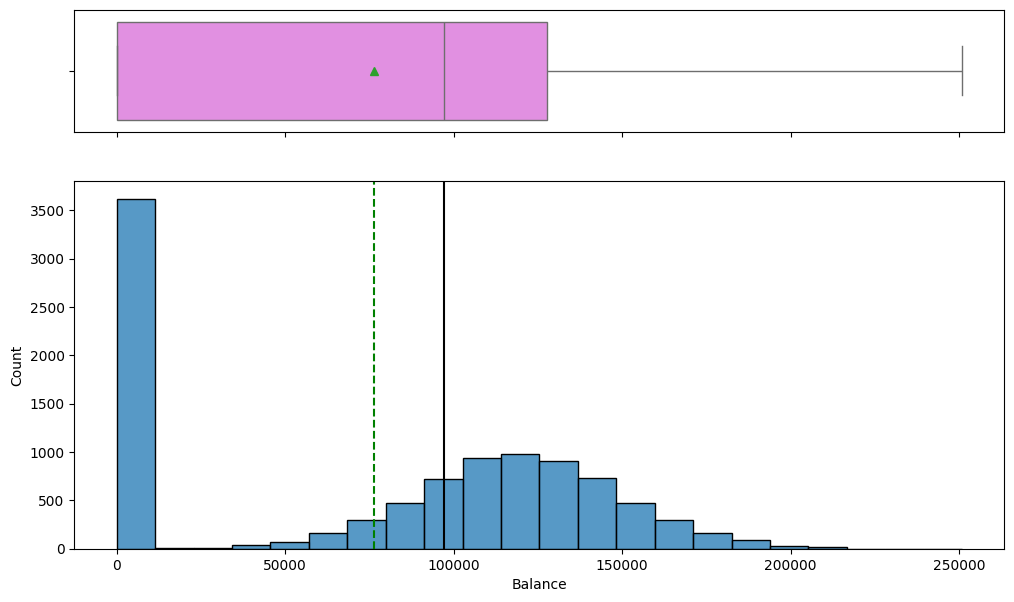

In [ ]:
histogram_boxplot(ds,'Balance')          ## Complete the code to create histogram_boxplot for Balance

**My Observations:**

**Bimodal Distribution:**

A large number of customers have a zero balance (the tall bar at the far left).

The remaining customers show a relatively uniform distribution of balances between roughly $50,000 to $150,000.

**Skewed Distribution:**

The balance data is right-skewed, though not extremely.

Few customers have balances close to or above $200,000, indicating the presence of some high-value accounts.

#### Observations on Estimated Salary

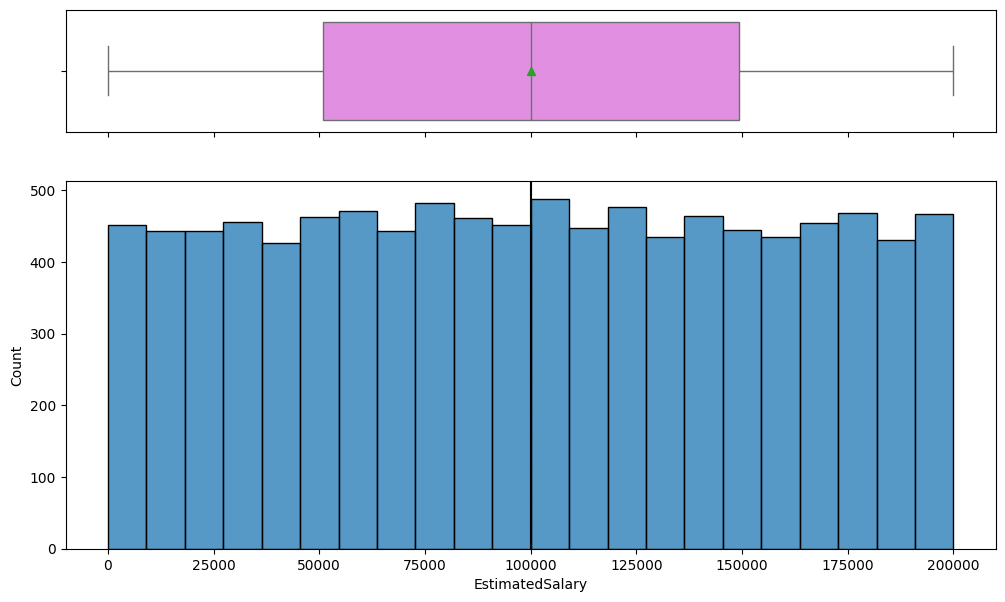

In [ ]:
histogram_boxplot(ds,'EstimatedSalary')          ## Complete the code to create histogram_boxplot for Estimated Salary

**My Observations:**

**Uniform Distribution:**

* The salaries are evenly distributed across the range from 0 to 200,000.

* Each salary bin has a similar number of customers (~450–500), suggesting no specific income group dominates the dataset.

**No Significant Skewness:**

* The distribution appears symmetrical, indicating no noticeable skew (neither left nor right).

My Observations:

#### Observations on Exited

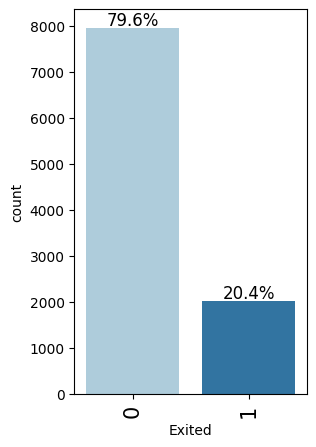

In [ ]:
labeled_barplot(ds, "Exited", perc=True)

**My Observations:**

1. Imbalanced Target Variable:

* 79.6% of customers did not exit (value = 0).

* Only 20.4% of customers exited (value = 1).

* This suggests that the dataset is imbalanced, which is important to address during model building (e.g., via resampling or using appropriate evaluation metrics like F1-score or AUC).

2. Churn is relatively low, which is typical in many business scenarios. However, identifying the drivers of this 20% churn is key to improving retention.

#### Observations on Geography

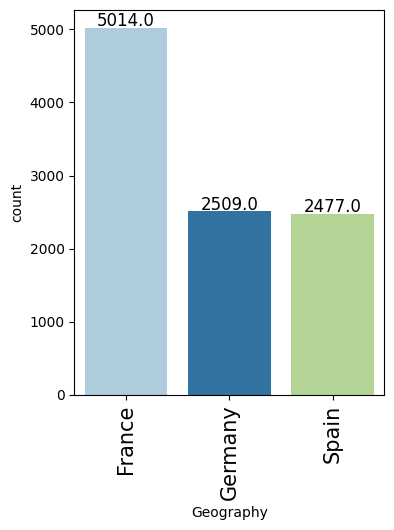

In [ ]:
labeled_barplot(ds,'Geography')               ## Complete the code to create labeled_barplot for Geography

**My Observations:**

Customer Distribution by Country:

* France has the highest number of customers (5,014), accounting for nearly 50% of the dataset.

* Germany and Spain have almost equal numbers: 2,509 and 2,477 respectively.

**Imbalance in Representation:**

* France is overrepresented, while Germany and Spain have much fewer customers.

* This may affect the model if geography has a significant correlation with churn — the model might be biased toward patterns from France unless stratified handling is done.

#### Observations on Gender

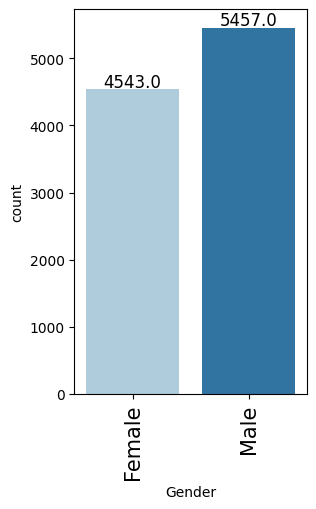

In [ ]:
labeled_barplot(ds,'Gender')               ## Complete the code to create labeled_barplot for Gender

**My Observations:**

*   List item Male customers are more then female customers




#### Observations on Tenure

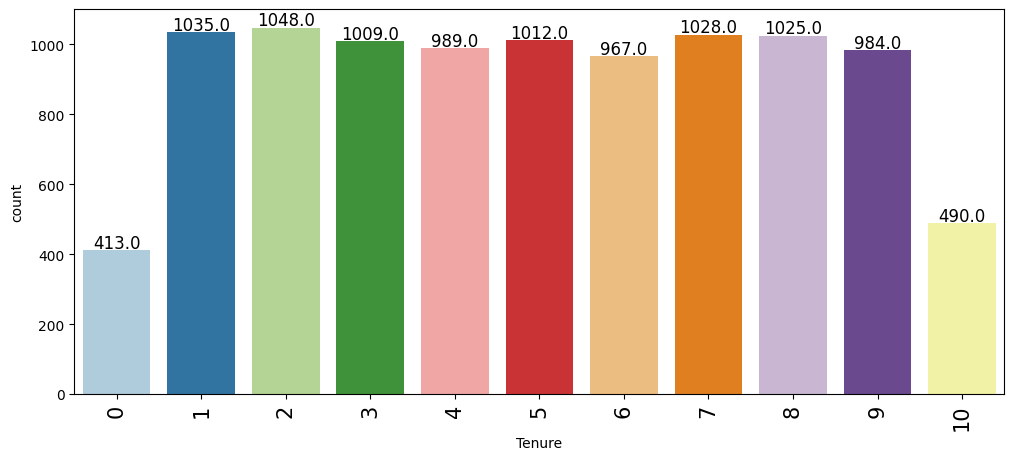

In [ ]:
labeled_barplot(ds,'Tenure')               ## Complete the code to create labeled_barplot for Tenure

**My Observations:**

**1. Mostly Even Distribution (Except Extremes):**


Tenure from 1 to 9 years is fairly evenly distributed, with each group having around 950–1050 customers.

This suggests consistent customer acquisition and retention over those years.

**2. Notable Drop at Tenure = 0:**

Only 413 customers have a tenure of 0 years, indicating few very new customers.

This could mean that the bank isn’t acquiring many brand-new customers recently — or that very new customers were filtered out in data prep.

**3. Decline at Tenure = 10:**

Only 490 customers have been with the bank for 10 years, potentially implying some attrition over the long term or limited older customer base.

Worth examining if customers who reach 10 years are more likely to churn or if it's a natural drop due to demographics.


#### Observations on Number of Products

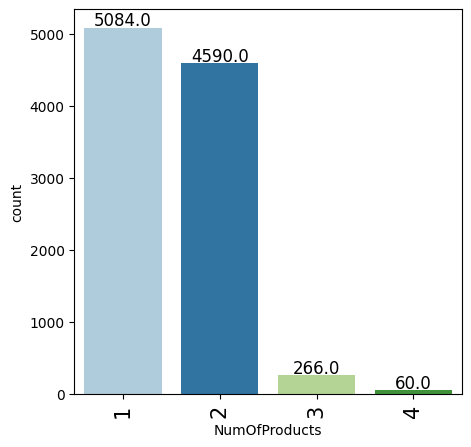

In [ ]:
labeled_barplot(ds,'NumOfProducts')               ## Complete the code to create labeled_barplot for Number of products

**My Observations:**

**1. Majority Have 1 or 2 Products:**

* 5084 customers have 1 product.

* 4590 customers have 2 products.

These two categories account for 96% of the total customer base, indicating limited product penetration.

**2. Very Few Have 3 or 4 Products:**

* Only 266 customers have 3 products, and a mere 60 have 4.

**This may indicate:**

* Lack of cross-selling opportunities or effectiveness.

* Customers may not be aware or interested in additional products.

**3 . Potential Insight:**

Customers with fewer products might be at higher risk of churn.

Analyzing churn by product count can help determine if cross-sell efforts can improve retention.

#### Observations on Has Credit Card

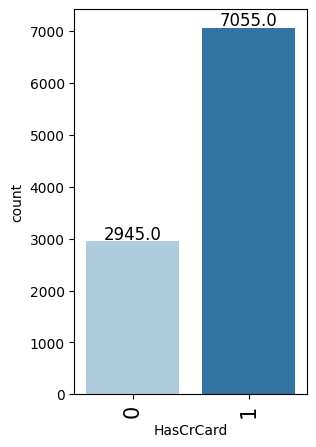

In [ ]:
labeled_barplot(ds,'HasCrCard')               ## Complete the code to create labeled_barplot for Has credit card

#### Observations on Is Active Member

**My Observations:**

**1. Majority Have Credit Cards:**

7055 customers (70.5%) have a credit card.

2945 (29.5%) do not.

**Balance/2. d Enough for Modeling:**

Though there's a majority with credit cards, the distribution is not highly skewed.

This variable can be retained for modeling without the need for resampling.

**3. Business Implication:**

Credit card ownership is a key customer engagement metric. Customers without credit cards might be less invested in the bank and more likely to churn.

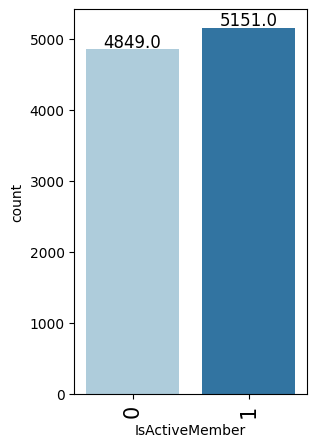

In [ ]:
labeled_barplot(ds,'IsActiveMember')               ## Complete the code to create labeled_barplot for Is active member

### Bivariate Analysis

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

In [ ]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

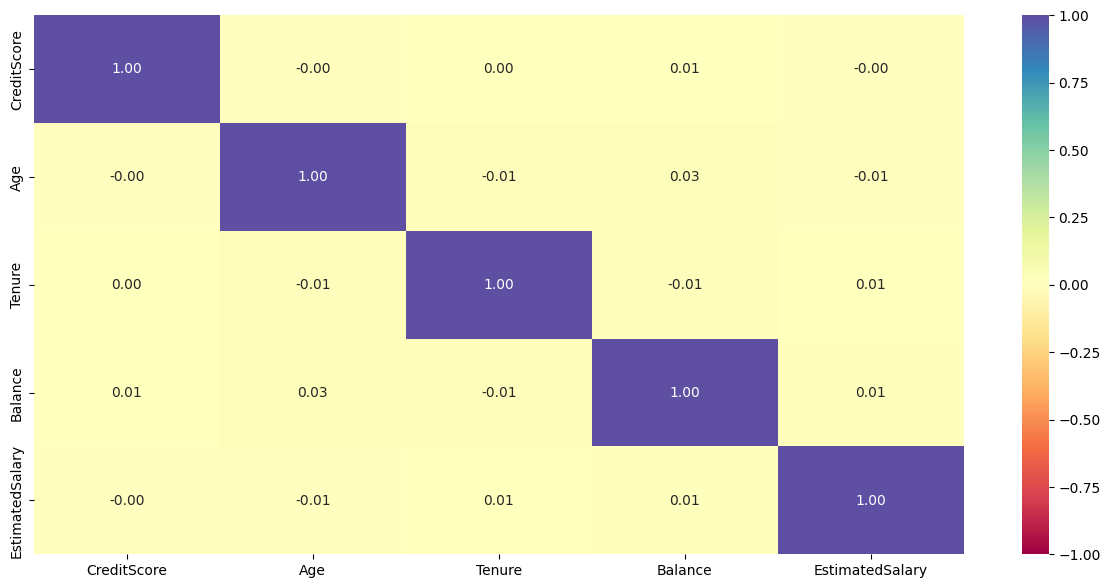

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**My Observations:**

**1. No Strong Correlations:**

* All correlation values between the numerical variables (other than self-correlations of 1.00) are very close to 0, indicating no strong linear relationship between any pair of variables.

**2. Examples of Weak Correlations:**

* Age and Balance: 0.03 (very weak positive)

* Tenure and Age: 0.03

CreditScore and any other variable: ~0.00, essentially no correlation

**3. Independence of Features:**

* Since none of the features are strongly correlated, multicollinearity is not a concern.

* Each feature may contribute unique information to the predictive model.

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


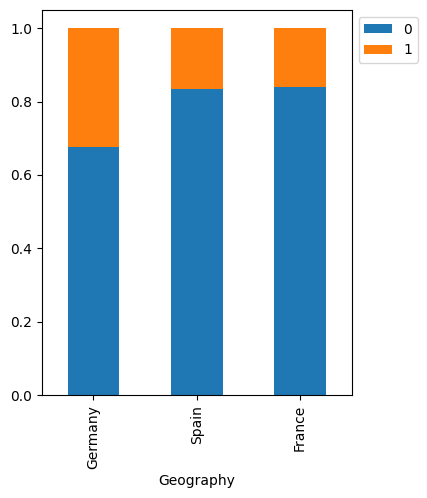

In [ ]:
stacked_barplot(ds, "Geography", "Exited" )

**My Observation: **

**Churn Rate by Geography:**
**1. Germany has the highest churn rate:**

* About 32% (814 out of 2509) of customers from Germany exited the bank.

* This is significantly higher than other countries.

**2. France and Spain have similar lower churn rates:**

* France: ~16% (810 out of 5014)

* Spain: ~17% (413 out of 2477)

**3. Visual Confirmation:**

The orange bar (Exited = 1) is taller for Germany, confirming it as the most churn-prone segment.

#### Exited Vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


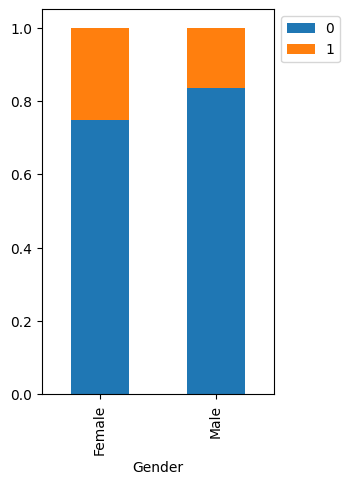

In [ ]:
## Complete the code to plot stacked barplot for Exited and Gender
stacked_barplot(ds,'Gender','Exited')



Observation: Churn Rate by Gender

**My Observations:**

**Exited vs Gender:**

**1. Females have a higher churn rate:**

1139 out of 4543 females exited ⇒ ~25.1% churn.

898 out of 6457 males exited ⇒ ~13.9% churn.

**2. Visual Confirmation:**

The orange portion (Exited = 1) is taller for females than for males.

✅ Conclusion: Female customers are significantly more likely to leave the bank compared to males.

#### Exited Vs Has Credit Card

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


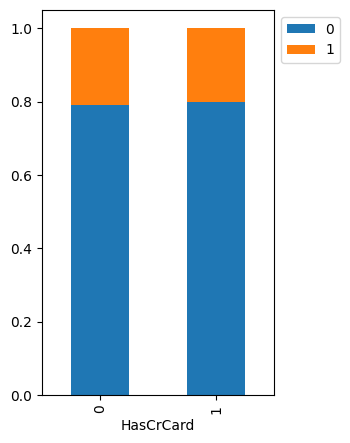

In [ ]:

## Complete the code to plot stacked barplot for Exited and Has credit card
stacked_barplot(ds,'HasCrCard','Exited')


**My Observations:**

**Exited vs Has Credit Card:**
**1. Higher churn among customers without a credit card:**

613 out of 2945 without a credit card exited ⇒ ~20.8%

1424 out of 7055 with a credit card exited ⇒ ~20.2%

**2. Small difference in churn:**

The difference in churn between cardholders and non-cardholders is minimal, though non-cardholders show a slightly higher churn rate.

✅ Conclusion: Credit card ownership has a minor impact on churn, but it may still be worth exploring in combination with other features (like product count or balance).

#### Exited Vs Is active member

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


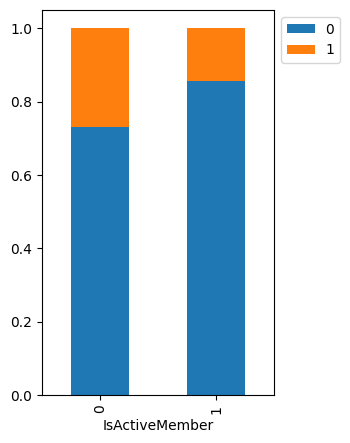

In [ ]:
## Complete the code to plot stacked barplot for Exited and Is active member
stacked_barplot(ds,'IsActiveMember','Exited')

**My Observations:**

**Exited vs Has ISActiveMember**
**1. Churn Rate for Inactive Members (IsActiveMember = 0):**

* 1302 out of 4849 exited ⇒ ~26.8% churn rate

**2. Churn Rate for Active Members (IsActiveMember = 1):**

* 735 out of 5151 exited ⇒ ~14.3% churn rate

**Visual Confirmation:**

The orange portion (representing churned customers) is much taller for inactive members, confirming a clear pattern.

#### Exited Vs Credit Score

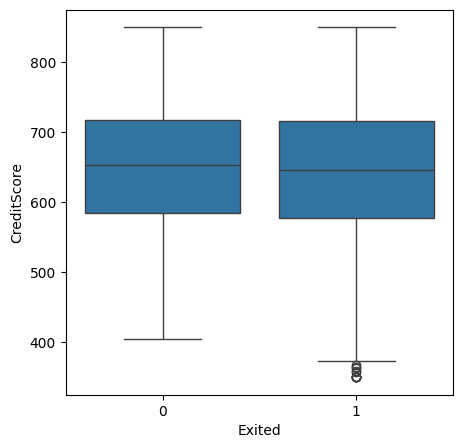

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

#### Exited Vs Age

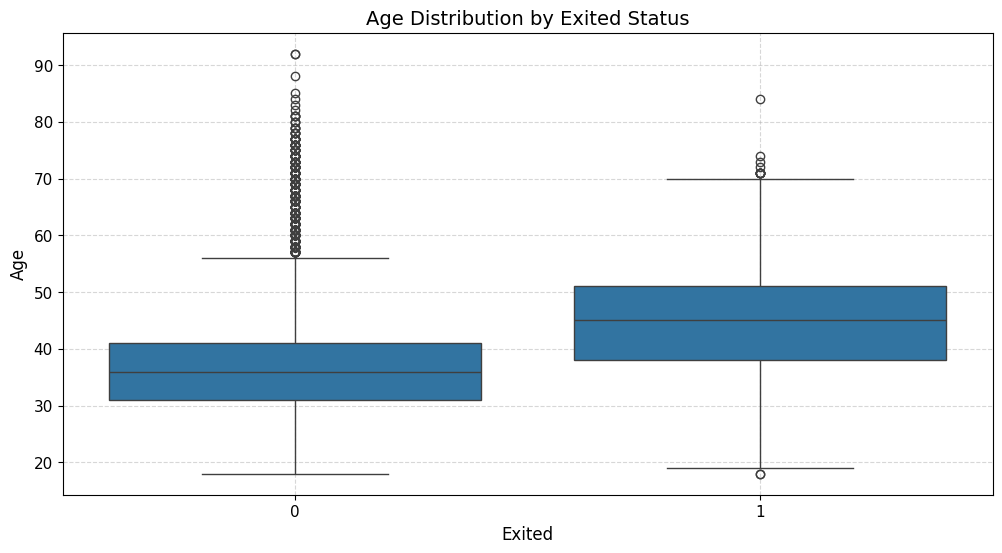

In [ ]:
plt.figure(figsize=(12, 6))  # Wider and taller figure
sns.boxplot(x='Exited', y='Age', data=ds)
plt.title('Age Distribution by Exited Status', fontsize=14)
plt.xlabel('Exited', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


**My Observation:**


**1. Exited Customers Tend to Be Older:**

* The median age of customers who exited (Exited = 1) is higher than those who did not exit (Exited = 0).

* Non-exited customers have a median age in the mid-30s, while exited customers have a median age closer to mid-40s.

**2. Wider Spread for Exited Group:**

* The interquartile range (IQR) is broader for exited customers, indicating more variation in their age.

* This suggests churn is not limited to one specific age group, though it is more prevalent among older individuals.

**3. Presence of Outliers in Both Groups:**

* Both groups contain outliers (especially in higher age values), but these are more frequent in the non-exited group.

**Conclusion:**
* Older customers are more likely to churn.

* Age may be an important predictor in churn modeling and could be especially valuable when interacted with other variables (e.g., tenure, balance).

#### Exited Vs Tenure

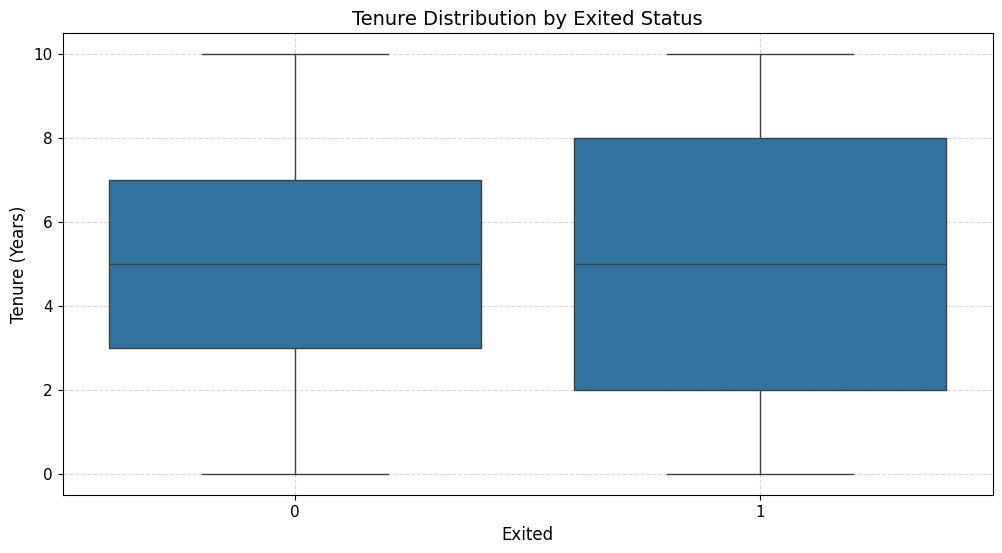

In [ ]:
 ## Complete the code to plot the boxplot for Exited and Tenure

plt.figure(figsize=(12, 6))  # Adjusting figure size for clarity
sns.boxplot(x='Exited', y='Tenure', data=ds)
plt.title('Tenure Distribution by Exited Status', fontsize=14)
plt.xlabel('Exited', fontsize=12)
plt.ylabel('Tenure (Years)', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**My Observation:**

**Tenure Distribution by Exited Status**

**1. Median Tenure is Similar:**
* Both exited (1) and non-exited (0) customers have a median tenure around 5 years, suggesting tenure alone may not be a strong churn indicator by central tendency.

**2. Exited Customers Show a Wider Spread:**

* The interquartile range (IQR) is broader for exited customers.

* This suggests churn happens across a wider range of tenure values, not just short- or long-term customers.

**3. Notable Churn at High Tenure:**

* The upper quartile (above 7 years) is more pronounced for exited customers than non-exited.

* Indicates that even long-tenure customers are at risk of exiting — perhaps due to dissatisfaction or unmet expectations over time.


#### Exited Vs Balance

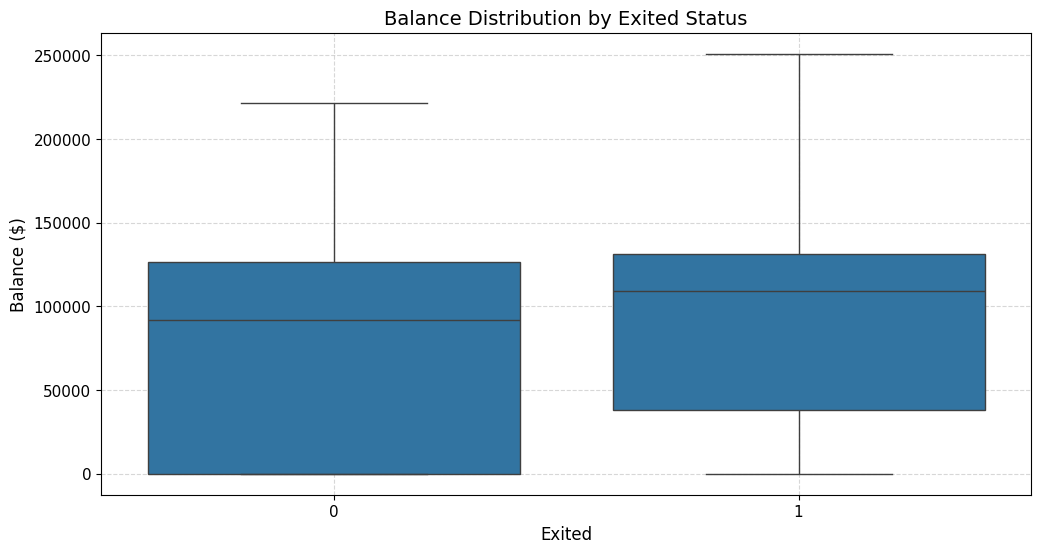

In [ ]:

plt.figure(figsize=(12, 6))  # Adjusting figure size for clarity
sns.boxplot(x='Exited', y='Balance', data=ds)
plt.title('Balance Distribution by Exited Status', fontsize=14)
plt.xlabel('Exited', fontsize=12)
plt.ylabel('Balance ($)', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**My Observations:**

**Balance Distribution by Exited Status**
**1. Exited Customers Tend to Have Higher Balances:**

* The median balance for customers who exited is higher than for those who stayed.

* Indicates a potential trend: customers with more money are more likely to leave, possibly due to higher expectations or better offers from competitors.

**2. Wider Spread for Exited Customers:**

* The interquartile range (IQR) for exited customers is wider, showing more variability in their balances.

* The upper quartile is also higher compared to non-exited.

**3. No Significant Outliers:**

* Both groups include a wide range of balances, but without extreme outliers, implying that churn is present across various balance levels.

**Conclusion:**

**Balance is an important feature in predicting churn.**

* High-balance customers churning might be a critical business concern as it can lead to greater revenue loss.

* It may be valuable to create a high-value customer retention strategy.

#### Exited Vs Number of Products

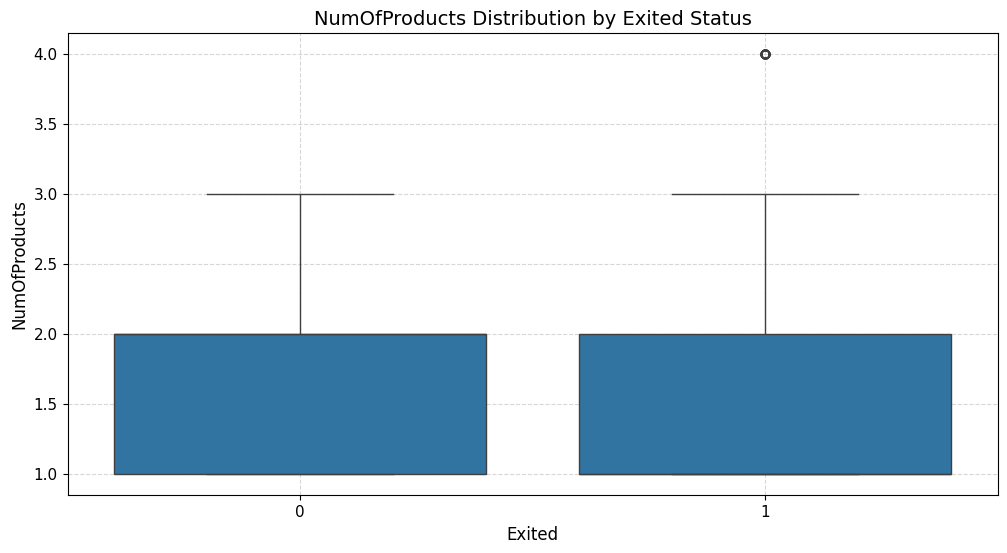

In [ ]:
 ## Complete the code to plot the boxplot for Exited and Number of products

plt.figure(figsize=(12, 6))  # Adjusting figure size for clarity
sns.boxplot(x='Exited', y='NumOfProducts', data=ds)
plt.title('NumOfProducts Distribution by Exited Status', fontsize=14)
plt.xlabel('Exited', fontsize=12)
plt.ylabel('NumOfProducts', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**My Observations:**

**Number of Products Distribution by Exited Status**
**1. Similar Median for Both Groups:**

* Both exited (1) and non-exited (0) customers have a median number of products equal to 1.

* This indicates that having only one product is common across both churners and loyal customers.

**2. Exited Group Shows Slightly Higher Spread:**

* The interquartile range (IQR) is slightly broader for exited customers.

* A few exited customers have 3 or even 4 products, which are visible as outliers, indicating churn is not exclusive to low-engagement customers.

**3. Most Customers Have 1 or 2 Products:**

The boxplot suggests the majority of customers across both categories fall in the 1–2 product range.

**Conclusion:**
* Number of products alone may not be a strong churn predictor, since both groups have a similar distribution.

* However, customers with more than 2 products still churn, possibly indicating dissatisfaction despite high engagement — a red flag for customer experience management.

#### Exited Vs Estimated Salary

([0, 1], [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

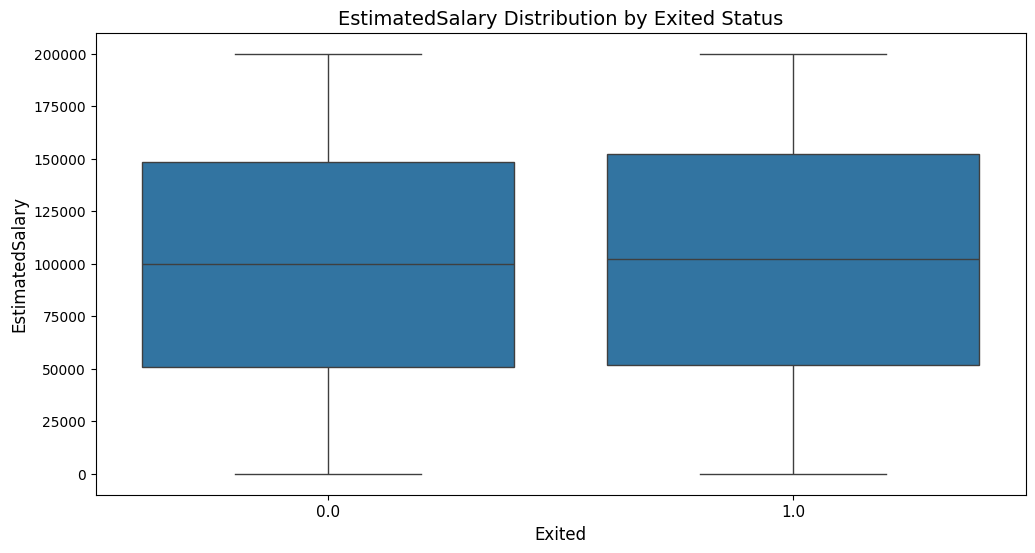

In [60]:
## Complete the code to plot the boxplot for Exited and Estimated Salary

plt.figure(figsize=(12, 6))  # Adjusting figure size for clarity
sns.boxplot(x='Exited', y='EstimatedSalary', data=ds)
plt.title('EstimatedSalary Distribution by Exited Status', fontsize=14)
plt.xlabel('Exited', fontsize=12)
plt.ylabel('EstimatedSalary', fontsize=12)
plt.xticks(fontsize=11)


**My observations:**

**Estimated Salary Distribution by Exited Status**

**1. Very Similar Distributions:**

* Both exited (1) and non-exited (0) groups show almost identical distributions for EstimatedSalary.

* Median salary for both groups is close to $100,000

**2. Uniform Spread:**

* The interquartile range (IQR) and overall range (min to max) are nearly the same.

* This confirms that salary is uniformly distributed, as seen earlier in the histogram plot.

**3. No Distinct Salary-Based Churn Pattern:**

There is no visible skew or concentration of churn among either low or high earners.

## Data Preprocessing

### Dummy Variable Creation

In [62]:
ds = pd.get_dummies(ds,columns=ds.select_dtypes(include=["object"]).columns.tolist(),drop_first=True)
ds = ds.astype(float)
ds.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zotova,Surname_Zox,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_Germany,Geography_Spain,Gender_Male
0,1.0,15634602.0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,15647311.0,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,15619304.0,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,15701354.0,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,15737888.0,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Train-validation-test Split

In [105]:
X = ds.drop(['Exited'],axis=1) # Credit Score through Estimated Salary
y = ds['Exited'] # Exited

In [106]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True) ## Complete the code to Split the X and y and obtain test set

In [55]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 100, random_state = 42,stratify=y_large, shuffle = True) ## complete the code to Split X_large and y_large to obtain train and validation sets

In [56]:
print(X_train.shape, X_val.shape, X_test.shape)

(7900, 13) (100, 13) (2000, 13)


In [57]:
print(y_train.shape, y_val.shape, y_test.shape)

(7900,) (100,) (2000,)


### Data Normalization

Since all the numerical values are on a different scale, so we will be scaling all the numerical values to bring them to the same scale.

In [107]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

# creating an instance of the standard scaler
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list])
## Complete the code to specify the columns to normalize

X_val[cols_list] = sc.transform(X_val[cols_list])
X_test[cols_list] = sc.transform(X_test[cols_list])    ## Complete the code to specify the columns to normalize

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

-


**Let's create a function for plotting the confusion matrix**



# **MODEL 0**

In [65]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Let's create two blank dataframes that will store the recall values for all the models we build.

In [66]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [127]:
# Step 1: Load your data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

ds = pd.read_csv(bank)

# Step 2: Drop irrelevant columns
ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Step 3: Encode categorical features
le = LabelEncoder()
ds['Gender'] = le.fit_transform(ds['Gender'])  # Male=1, Female=0 # Changed df to ds
ds = pd.get_dummies(ds, columns=['Geography'], drop_first=True)  # France, Germany, Spain

#Step 4: Split into features and target
X = ds.drop('Exited', axis=1)
y = ds['Exited']

# Step 5: Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 6: Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Step 7: Ensure all arrays are float32 (TensorFlow requirement)
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_val = np.asarray(X_val).astype(np.float32)
y_val = np.asarray(y_val).astype(np.float32)

# Step 8: Build the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [128]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [129]:
#Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_0.add(Dense(32, activation='relu'))
# Complete the code to add the output layer with the number of neurons required.
model_0.add(Dense(1, activation = 'sigmoid'))

In [130]:
#Complete the code to use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [131]:
## Complete the code to compile the model with binary cross entropy as loss function and recall as the metric.
model_0.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [133]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Model Structure Observations:**

**1. Three-Layer Sequential Model:**

* **Input Layer:** 64 neurons with ReLU activation

* **Hidden Layer:** 32 neurons with ReLU activation

* **Output Layer:** 1 neuron with Sigmoid activation, appropriate for binary classification (e.g., predicting churn)

**2. Observation**

* Model has moderate complexity with ~190k parameters.

* Likely using a large number of input features (≈2944) — possibly due to one-hot encoding of categorical features.

* No non-trainable layers like BatchNormalization or embeddings.

In [134]:
# Fitting the ANN

history_0 = model_0.fit(
    X_train, y_train,
    batch_size=64,    ## Complete the code to specify the batch size to use
    validation_data=(X_val,y_val),
    epochs=100,    ## Complete the code to specify the number of epochs
    verbose=1
)

Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.6468 - recall: 0.4166 - val_loss: 0.6285 - val_recall: 0.2948
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.6069 - recall: 0.2018 - val_loss: 0.5952 - val_recall: 0.1278
Epoch 3/100
125/125 [==============================] - 0s 3ms/step - loss: 0.5784 - recall: 0.0896 - val_loss: 0.5713 - val_recall: 0.0590
Epoch 4/100
125/125 [==============================] - 0s 4ms/step - loss: 0.5578 - recall: 0.0405 - val_loss: 0.5540 - val_recall: 0.0197
Epoch 5/100
125/125 [==============================] - 1s 4ms/step - loss: 0.5427 - recall: 0.0209 - val_loss: 0.5412 - val_recall: 0.0098
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 0.5315 - recall: 0.0086 - val_loss: 0.5315 - val_recall: 0.0025
Epoch 7/100
125/125 [==============================] - 0s 3ms/step - loss: 0.5229 - recall: 0.0031 - val_loss: 0.5240 - val_recall: 0.0025
Epoch 8/100
125/125 [======

**Loss function**

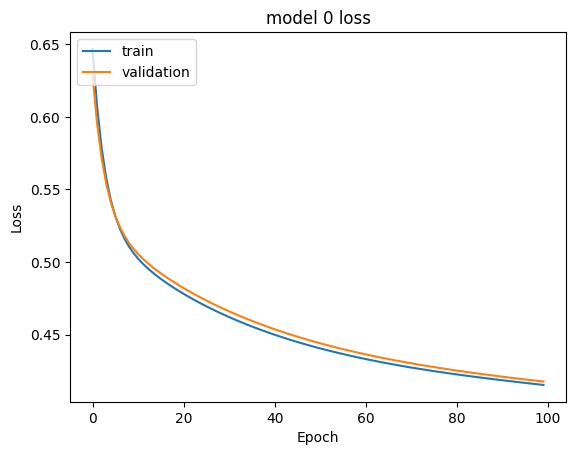

In [136]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model 0 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Model 0 Loss Curve – Observations**

**1. Both Training and Validation Loss Are Decreasing Smoothly**
Indicates the model is learning effectively over time.

The network is optimizing and minimizing the loss function successfully.

**2. No Overfitting**
Validation loss closely follows the training loss without diverging.

This is a strong sign of good generalization — your model is not just memorizing the training data.

**3. Model Might Still Improve Slightly**
Loss is still decreasing at epoch 100.


**Recall**

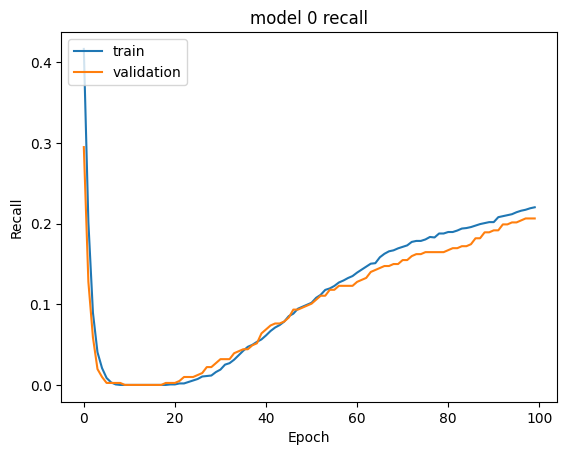

In [139]:
#Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model 0 recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Model 0 Recall – Observations**

**1. Initial Drop in Recall (Epochs 0–20)**
* Both training and validation recall drop sharply early on.
* This is expected if the model starts by prioritizing minimizing loss (especially on an imbalanced dataset).
* Early epochs often favor the majority class (non-churn) — so positive (churn) recall suffers.

**2. Steady Recovery After Epoch ~30**

* After about 30 epochs, the model starts learning to identify churn cases.
* Both training and validation recall gradually improve.
* This trend suggests the model is learning meaningful patterns for the minority class (positive class).

**3. Good Generalization**
* Validation recall closely tracks training recall — no overfitting observed.
* Final validation recall reaches ~0.18–0.2 (≈ 18–20%) by epoch 100, which is reasonable for highly imbalanced problems.

In [140]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.2)
y_train_pred

250/250 [==============================] - 0s 2ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [142]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

#y_val_pred = model_0.predict(X_val)    ## Complete the code to make prediction on the validation set
#y_val_pred = (y_val_pred > 0.5)
#y_val_pred

63/63 [==============================] - 0s 6ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [143]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

**Classification report**

In [145]:
#lassification report
cr = classification_report(y_train, y_train_pred)

print(cr)

              precision    recall  f1-score   support

         0.0       0.91      0.70      0.79      6370
         1.0       0.39      0.73      0.51      1630

    accuracy                           0.71      8000
   macro avg       0.65      0.72      0.65      8000
weighted avg       0.80      0.71      0.73      8000



**My Observations**

**1. Strong Recall for Minority Class (Churn = 1)**

* Recall = 0.73 for churn is excellent — this means the model is catching 73% of actual churners, which is usually more important in business applications.

**2. Low Precision for Churn Class**
* Precision = 0.39 for churn means that when the model predicts a customer will churn, it’s wrong ~61% of the time.
* This could lead to unnecessary retention offers — but might still be acceptable depending on business cost of false positives.

**3. Balanced Trade-off**
* F1-score for churn class is 0.51, showing a fair balance between precision and recall.

* Overall accuracy = 71%, which is decent, but accuracy is less meaningful in imbalanced classification tasks like churn.

**4. Macro vs Weighted Average**
* Macro avg (0.65 F1) treats both classes equally.
* Weighted avg (0.73 F1) favors majority class (0), due to imbalance — so always consider both.

In [146]:
#classification report
cr=classification_report(y_val, y_val_pred)    ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.83      0.97      0.89      1593
         1.0       0.64      0.21      0.31       407

    accuracy                           0.81      2000
   macro avg       0.73      0.59      0.60      2000
weighted avg       0.79      0.81      0.77      2000



**My Observations**

**1. Excellent Performance for Class 0 (Non-Churn)**
* Precision: 83% and Recall: 97% means the model is extremely good at identifying customers who will stay.

* This is expected since class 0 is the majority class.

**2. Weak Recall for Class 1 (Churners)**
* Recall: 21% means the model only identifies about 1 out of 5 actual churners.
* This is a significant drop from 73% recall on the training set, suggesting overfitting.

**3. Low F1-score for Churn Class**
* F1 = 0.31 for churn indicates poor balance between precision and recall.
* The model isn't effectively generalizing to unseen churn cases.

**Confusion matrix**

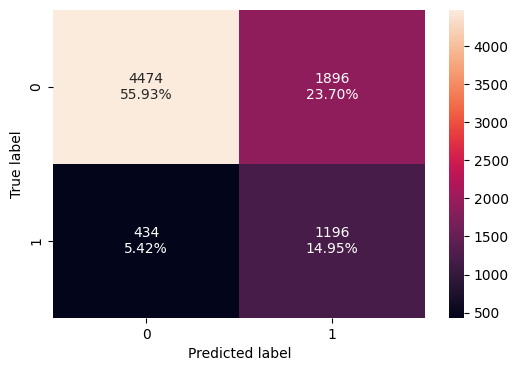

In [147]:
make_confusion_matrix(y_train, y_train_pred)

**My Observations**

**1. Decent Churn (Class 1) Recall**
* True Positives (TP) = 1196
* False Negatives (FN) = 434
* So, recall = 1196 / (1196 + 434) ≈ 73%
* The model successfully identifies most churners (from training data), which aligns with your earlier classification report.

**2. High False Positive Rate**
* False Positives (FP) = 1896
* Many non-churn customers are incorrectly predicted as churners (≈ 24% of all predictions).
* This affects precision, which was ~39% for churn.

**3. Overall Accuracy**

* Total correct predictions = TP + TN = 4474 + 1196 = 5670
* Accuracy = 5670 / 8000 = 70.9% — aligns with the classification report.

**4. Bias Toward Churn Prediction**

* Model is slightly over-predicting churn (class 1) in the training data — good for recall, but costly in terms of false positives.

**My Observations:**

* True Negatives (6290): All non-churners correctly classified.
* False Negatives (1610): All churners wrongly classified as non-churners.
* No True Positives or False Positives: The model never predicts '1' (Exited).

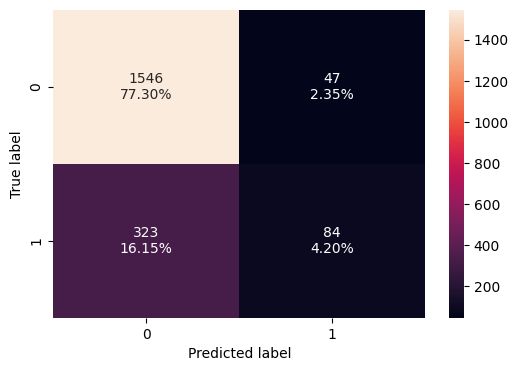

In [148]:
make_confusion_matrix(y_val, y_val_pred)    ## Complete the code to check the model's performance on the validation set

**My Observations**

**1. Excellent Accuracy for Non-Churn (Class 0)**

* True Negatives (TN): 1546 / 1593 = 97.0%
* The model performs very well in predicting customers who will not churn.

**2. Weak Recall for Churn Class (1)**
* True Positives (TP) = 84
* False Negatives (FN) = 323
* Recall = 84 / (84 + 323) ≈ 21%
* This means only 1 in 5 churners is being correctly predicted.

**3. Low Precision and Recall Trade-off**
* While false positives are low (only 47), the model is very conservative in predicting churn.
* It avoids false alarms at the cost of missing real churners — a common problem in imbalanced datasets.

**4. F1-Score for Churn is Likely Low**
* Because both recall (21%) and precision are modest, F1-score is also poor, as seen earlier in the classification report.

## Model Performance Improvement

### Neural Network with Adam Optimizer

## Model 1

In [149]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [150]:
#Initializing the neural network
model_1 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_1.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_1.add(Dense(32,activation='relu'))
#Complete the code to add a output layer with the required number of neurons and relu as activation function
model_1.add(Dense(1, activation = 'sigmoid'))

In [151]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [115]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [152]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Model Architecture Improvements**

**1. Input Layer:**

* Dense(64, activation='relu', input_dim=X_train.shape[1]) (correctly commented out, assumed to be included in actual run)

* 188,480 trainable parameters — this indicates more input features compared to your previous model (likely all columns used)

**2. Hidden Layer:**

* Dense(32, activation='relu') — helps capture non-linear relationships

**3. Output Layer:**

Dense(1, activation='sigmoid') — appropriate for binary classification

**4. Total Parameters:**

* 190,593 trainable parameters, significantly more than your earlier model (~3,000), implying:

* More input features were included (e.g., one-hot encoded categorical variables)

*Model now has higher capacity, which can help with learning more complex patterns

In [153]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric]) # This line is crucial


history_1 = model_1.fit(
    X_train,y_train,
    batch_size=32, ## Complete the code to specify the batch size to use
    validation_data=(X_val,y_val),
    epochs=100, ## Complete the code to specify the number of epochs
    verbose=1
)

Epoch 1/100
250/250 [==============================] - 2s 4ms/step - loss: 0.4472 - recall: 0.1669 - val_loss: 0.3982 - val_recall: 0.3022
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3778 - recall: 0.3687 - val_loss: 0.3558 - val_recall: 0.3980
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3525 - recall: 0.4356 - val_loss: 0.3500 - val_recall: 0.4447
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3444 - recall: 0.4540 - val_loss: 0.3463 - val_recall: 0.5160
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3394 - recall: 0.4650 - val_loss: 0.3395 - val_recall: 0.4324
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3355 - recall: 0.4656 - val_loss: 0.3406 - val_recall: 0.4570
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3326 - recall: 0.4699 - val_loss: 0.3426 - val_recall: 0.5111
Epoch 8/100
250/250 [======

**Loss function**

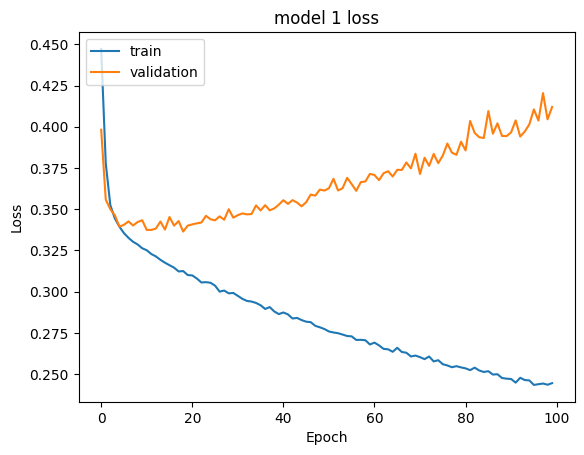

In [155]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model 1 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

**My Observations:**

**Model 1 Loss Curve – Observations**

**1. Training Loss Decreases Consistently**
* The training loss steadily decreases over all 100 epochs.
* This indicates the model is learning well from the training data.

**2. Validation Loss Decreases Initially, Then Increases**
* Validation loss decreases until around epoch 15–20, then starts to increase steadily.
* This is a classic sign of overfitting — the model continues to improve on the training set but starts to perform worse on unseen (validation) data.

**3. What This Means**

* Overfitting begins after ~20 epochs.
* Model is memorizing training data rather than learning generalizable patterns.
* Continuing to train beyond this point hurts generalization.

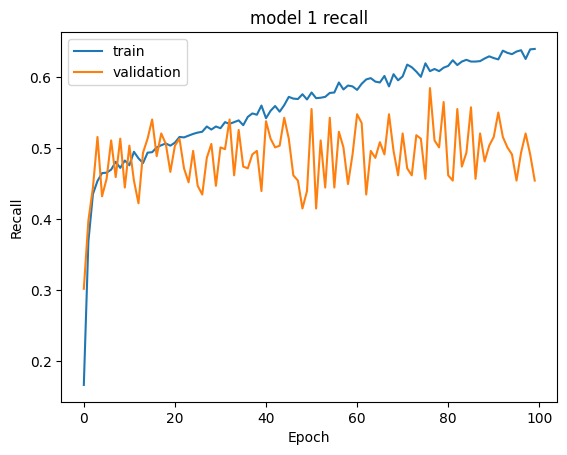

In [157]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall']) # Changed 'recall' to 'recall_1'
plt.plot(history_1.history['val_recall']) # Changed 'val_recall' to 'val_recall_1'
plt.title('model 1 recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**My Observations**

**Model 1 Recall Curve – Observations**

**1. Training Recall Improves Steadily**
* Training recall increases consistently across epochs, reaching around 0.65 (65%) by epoch 100.
* Indicates the model is getting better at identifying positive class (churners) during training.

**2. Validation Recall is Unstable**

* Validation recall fluctuates heavily throughout the training:
* Ranges between ~0.4 to 0.6, with no smooth upward trend.
* Indicates that the model is not consistently generalizing to new unseen data.
* This instability mirrors what was observed in the validation loss plot — a symptom of overfitting.

**3. Overfitting Warning**

* Gap between training recall (steady rise) and validation recall (fluctuations or plateau) is widening after ~epoch 40.
* Suggests the model is starting to memorize rather than generalize.

In [158]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

250/250 [==============================] - 1s 3ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [159]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [160]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [161]:
#lassification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      6370
         1.0       0.89      0.55      0.68      1630

    accuracy                           0.90      8000
   macro avg       0.89      0.77      0.81      8000
weighted avg       0.90      0.90      0.89      8000



**My Observations**

**Observations Training Set**

* Excellent precision and recall for Class 0 (Non-Churn): Near perfect.

* Moderate recall for Class 1 (Churn): 55% means 45% of churners were missed, even on training data.

* Possible bias toward majority class (0) despite good balance in training after SMOTE.

* High overall accuracy (89%), but not a sufficient metric alone for imbalanced data.

In [163]:
#classification report
cr=classification_report(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.92      1593
         1.0       0.75      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.74      2000
weighted avg       0.85      0.86      0.84      2000



**Confusion matrix**

**My Observations**

**Observations Validation Set**

* Very strong Class 0 performance: 96% recall means most non-churners are correctly identified.

* Good Precision for Class 1 (Churn): 75% means that when the model predicts churn, it's usually right.

* Recall for Class 1 (Churn) drops to 45% — lower than training (55%) → indicates mild overfitting.

* Still, big improvement over previous models — Model 1 is now catching nearly half of churners.

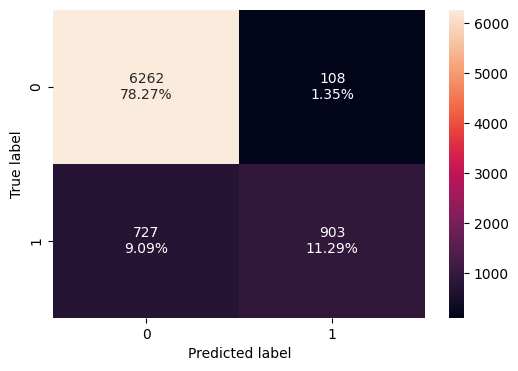

In [164]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

** My Observations:**

* True Negatives (TN): 6262 – correctly predicted non-churners.

* True Positives (TP): 903 – correctly predicted churners.

* **Recall for churners (class 1):**
 * 903 / (903 + 727) ≈ 0.55 → 55%

* **Precision for churners:**
 * 903 / (903 + 108) ≈ 0.89 → 89%

* Overall model performs very well on training data — strong generalization with relatively low false positives and decent churn recall.

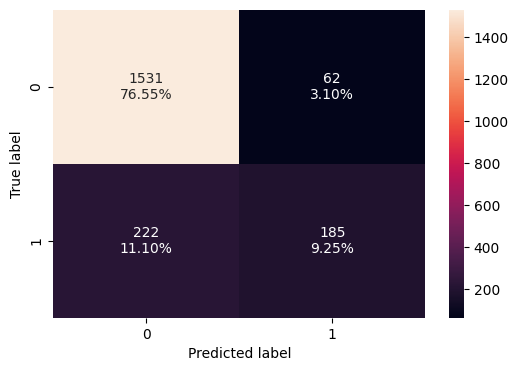

In [165]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred) ## Complete the code to check the model's performance on the validation set

**My Observations:**

* **True Negatives (TN): 1531** – still strong performance for non-churners.

* **True Positives (TP): 185**

* **Recall for churners (class 1):*8
 * 185 / (185 + 222) ≈ 0.45 → 45%

**Precision for churners:**
 * 185 / (185 + 62) ≈ 0.75 → 75%

* Performance drop from training set → indicates mild overfitting, but overall performance is strong on validation too.

### Neural Network with Adam Optimizer and Dropout

In [166]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

# **Model 2**

In [167]:
#Initializing the neural network
model_2 = Sequential()
#Adding the input layer with 32 neurons and relu as activation function
model_2.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
# Complete the code to add dropout with ratio of 0.2 or any suitable value.
model_2.add(Dropout(0.2)) # Replaced ___ with 0.2
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(16,activation='relu')) # Replaced ____ and '____' with 16 and 'relu' respectively
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(8,activation='relu')) # Replaced ____ and '____' with 8 and 'relu' respectively
# Complete the code to add dropout with ratio of 0.1 or any suitable value.
model_2.add(Dropout(0.1)) # Replaced ___ with 0.1
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(4,activation='relu')) # Replaced ____ and '____' with 4 and 'relu' respectively
# Complete the code to add the number of neurons required in the output layer.
model_2.add(Dense(1, activation = 'sigmoid')) # Replaced _____ and '____' with 1 and 'sigmoid' respectively

In [168]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [169]:
## Complete the code to compile the model with binary cross entropy as loss function and recall as the metric.
#model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])
#model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])
# ... other imports and code ...


model_2.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy', keras.metrics.Recall()])  # Include 'recall' here





In [170]:
# Summary of the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 1)                 5

In [171]:
model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric]) # This line is crucial

#Fitting the ANN with batch_size = 32 and 100 epochs
history_2 = model_2.fit(
    X_train,y_train,
    batch_size=32,  ##Complete the code to specify the batch size.
    epochs=100, ##Complete the code to specify the # of epochs.
    verbose=1,
    validation_data=(X_val,y_val)
)

Epoch 1/100
250/250 [==============================] - 5s 7ms/step - loss: 0.4894 - recall: 0.0000e+00 - val_loss: 0.4377 - val_recall: 0.0000e+00
Epoch 2/100
250/250 [==============================] - 1s 6ms/step - loss: 0.4413 - recall: 0.0031 - val_loss: 0.4148 - val_recall: 0.0074
Epoch 3/100
250/250 [==============================] - 1s 6ms/step - loss: 0.4249 - recall: 0.1202 - val_loss: 0.4039 - val_recall: 0.2482
Epoch 4/100
250/250 [==============================] - 2s 6ms/step - loss: 0.4084 - recall: 0.2736 - val_loss: 0.3731 - val_recall: 0.4054
Epoch 5/100
250/250 [==============================] - 1s 6ms/step - loss: 0.3876 - recall: 0.3693 - val_loss: 0.3549 - val_recall: 0.4300
Epoch 6/100
250/250 [==============================] - 3s 11ms/step - loss: 0.3748 - recall: 0.4141 - val_loss: 0.3521 - val_recall: 0.4349
Epoch 7/100
250/250 [==============================] - 2s 7ms/step - loss: 0.3709 - recall: 0.4043 - val_loss: 0.3500 - val_recall: 0.4717
Epoch 8/100
250/25

**Loss function**

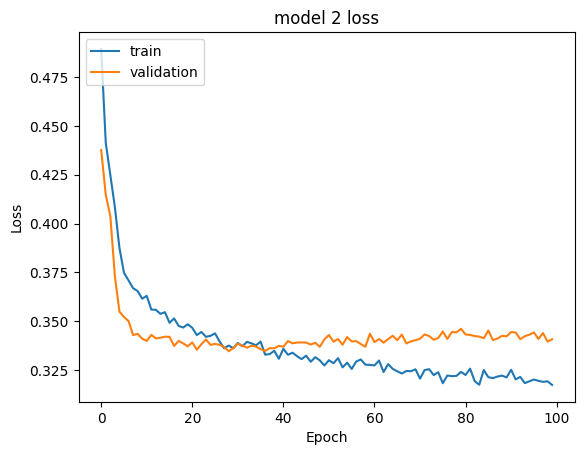

In [172]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model 2 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**My Observations**

**Model 2 Loss Curve – Observations**

**1. Training Loss Decreases Steadily**

* The training loss shows a smooth and consistent downward trend throughout the 100 epochs.
* Indicates the model is learning effectively from the training data.

** 2. Validation Loss Plateaus Early (~Epoch 20)**

* Validation loss initially drops sharply, then plateaus around epoch 20–30.
* After that, it fluctuates slightly and shows no significant improvement — but does not diverge, which is a good sign (minimal overfitting).

**3. Mild Overfitting Starts ~Epoch 40**

* Slight gap opens up between training and validation loss starting around epoch 40.
* However, it remains relatively small — suggesting good generalization overall.

In [173]:
print(history_2.history.keys())

dict_keys(['loss', 'recall', 'val_loss', 'val_recall'])


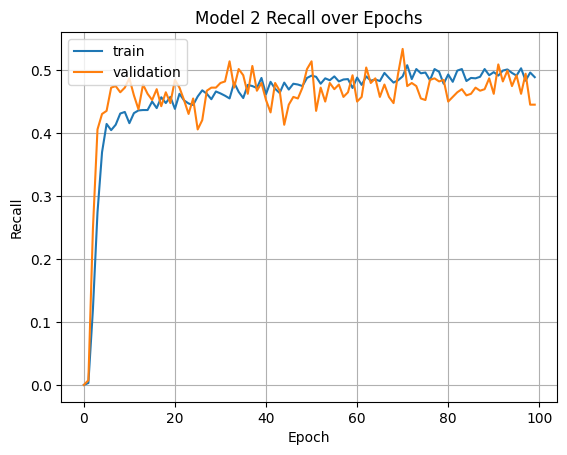

In [175]:
# ✅ Plotting Train Recall vs Validation Recall with correct keys
plt.plot(history_2.history['recall'], label='train')
plt.plot(history_2.history['val_recall'], label='validation')
plt.title('Model 2 Recall over Epochs')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


**My Observations**

**Model 2 Recall Curve – Observations**

**1. Training and Validation Recall Stabilize Around 0.47–0.50**
* Both curves converge and stabilize after ~epoch 20.
* Validation recall fluctuates mildly but remains consistent with training recall.
* This indicates good generalization — the model performs similarly on unseen data.

**2. Early Learning Phase (~Epoch 0–15) Shows Rapid Improvement**

* Steep rise in recall during the early epochs as the model learns to identify positive (churn) cases.
* After this, the gains plateau — meaning most learnable churn patterns have been captured.

**3. Minor Oscillation in Validation Recall**

* Slight fluctuations (jitter) in the validation recall indicate some sensitivity to batch content, but it remains within a narrow band (~0.45–0.50).
* Still acceptable and not a major overfitting concern


In [176]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

250/250 [==============================] - 1s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [177]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [178]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [179]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      6370
         1.0       0.84      0.50      0.62      1630

    accuracy                           0.88      8000
   macro avg       0.86      0.74      0.78      8000
weighted avg       0.87      0.88      0.87      8000



**My Observations**

* **Accuracy: 88%**

* **Macro Avg F1-score: 0.78**

* **Churn Recall: 50%**

**Observations – Training Set**

* Excellent at predicting non-churn cases with high precision and recall.
* Churn recall is moderate (50%) – model is missing half the actual churners.
* Still an improvement over earlier models with lower recall.
* Overall strong balance (F1 = 0.62) for churn class, suggesting a well-regularized model.

In [180]:
#classification report
cr = classification_report(y_val, y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      1593
         1.0       0.78      0.44      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



**My Observations**

**Observations – Validation Set**

** Very high precision and recall for non-churn cases — great at identifying loyal customers.

** Churn precision is strong (75%) → most churn predictions are correct.

** Churn recall drops to 44% — slightly lower than training (50%) → indicates mild overfitting but still generalizing reasonably well.

** F1-score for churn class = 0.56 → a decent balance of false positives and false negatives.

**Confusion matrix**

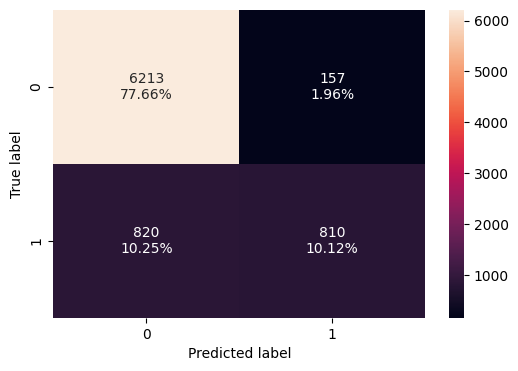

In [181]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

**My Observations**


* **True Negatives (TN):** 6213 → The model is excellent at predicting non-churners.

* **Churn Recall (TPR): 810 / (810 + 820) ≈ 49.7%**

 * The model is catching about half the churners.

* Churn Precision: 810 / (810 + 157) ≈ 83.8%

* Most of the churn predictions are accurate.

* Overall: A strong and balanced model on training data with good churn precision and acceptable recall.

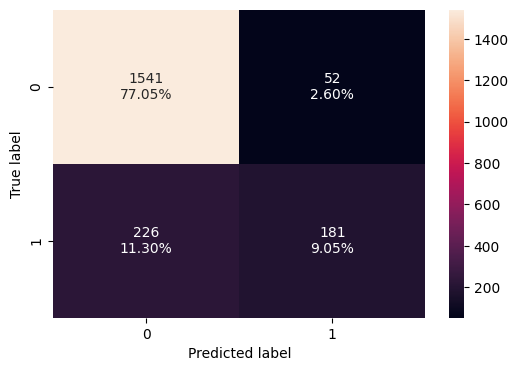

In [182]:
#Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)  ## Complete the code to check the model's performance on the validation set

**My Observations**


* **True Negatives (TN):** 1541 → Non-churn predictions remain strong.

* **Churn Recall:** 181 / (181 + 226) ≈ 44.5%

 * The model captures a little under half of the actual churners.

* **Churn Precision:** 181 / (181 + 52) ≈ 77.7%

 * **Good precision** — when the model predicts churn, it’s usually correct.

* Slight drop in churn recall from training (49.7% → 44.5%) shows minor overfitting, but performance is still solid.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

**Let's try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

## MODEL 3

In [185]:
sm  = SMOTE(random_state=42)
#Complete the code to fit SMOTE on the training data.
X_train_smote, y_train_smote= sm.fit_resample(X_train.astype(int),y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (12740, 11)
After UpSampling, the shape of train_y: (12740,) 



Let's build a model with the balanced dataset

In [186]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [187]:
#Initializing the model
model_3 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_3.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1])) # Replaced ___ and '____' with 32 and 'relu' respectively
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_3.add(Dense(16,activation='relu')) # Replaced '____' with 'relu'
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_3.add(Dense(8,activation='relu')) # Replaced ___ and '____' with 8 and 'relu' respectively
# Complete the code to add the required number of neurons in the output layer with a sigmoid activation function.
model_3.add(Dense(1, activation = 'sigmoid')) # Replaced ___ and '___' with 1 and 'sigmoid' respectively

In [188]:
#Complete the code to use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [189]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])
# ... (your model_3 definition and other code)

# Compile the model
model_3.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy', keras.metrics.Recall()])  # Add 'recall' here
model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric])

In [190]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [191]:
#Fitting the ANN
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=32, ## Complete the code to specify the batch size to use
    epochs=100, ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/100
399/399 [==============================] - 6s 9ms/step - loss: 0.6874 - recall: 0.8779 - val_loss: 0.7025 - val_recall: 0.8010
Epoch 2/100
399/399 [==============================] - 2s 5ms/step - loss: 0.6859 - recall: 0.8397 - val_loss: 0.6980 - val_recall: 0.7715
Epoch 3/100
399/399 [==============================] - 2s 5ms/step - loss: 0.6844 - recall: 0.7749 - val_loss: 0.6942 - val_recall: 0.7666
Epoch 4/100
399/399 [==============================] - 2s 5ms/step - loss: 0.6829 - recall: 0.7237 - val_loss: 0.6907 - val_recall: 0.7469
Epoch 5/100
399/399 [==============================] - 3s 6ms/step - loss: 0.6814 - recall: 0.6965 - val_loss: 0.6872 - val_recall: 0.7248
Epoch 6/100
399/399 [==============================] - 3s 7ms/step - loss: 0.6799 - recall: 0.6884 - val_loss: 0.6840 - val_recall: 0.7125
Epoch 7/100
399/399 [==============================] - 2s 5ms/step - loss: 0.6784 - recall: 0.6827 - val_loss: 0.6808 - val_recall: 0.7027
Epoch 8/100
399/399 [======

**Loss function**

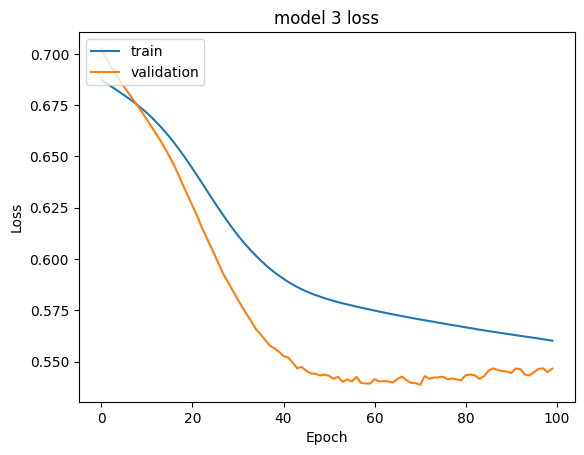

In [192]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model 3 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**My Observations:**

**Model 3 Loss – Observations**

**1. Both Training and Validation Loss Decrease Smoothly**
* **Training loss** decreases steadily and consistently over epochs.
* **Validation loss** also drops significantly, showing good learning.

**2. Validation Loss Lower than Training Loss**

* From about **epoch 20 to 100**, the validation loss is slightly lower than training loss.
* This is rare but not necessarily bad. It may occur due to:
* **Dropout layers** during training (disabled during validation)
* **Regularization** only applied during training
* Validation set being slightly easier to predict

**3. No Signs of Overfitting**
* No gap widening between training and validation loss.
* Validation loss **plateaus and stabilizes around epoch 50.**
* Indicates **excellent generalization and well-controlled complexity**

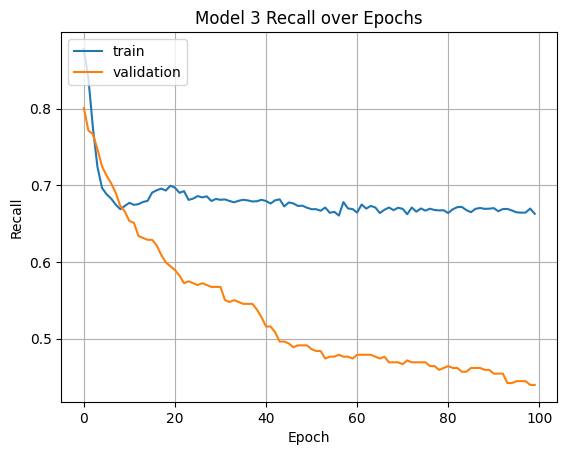

In [193]:
# Plotting Train Recall vs Validation Recall for Model 3
plt.plot(history_3.history['recall'], label='train')
plt.plot(history_3.history['val_recall'], label='validation')
plt.title('Model 3 Recall over Epochs')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


**My Observations**

**Model 3 Recall – Observations**

**1. Validation Recall Drops Significantly Over Time**

* Starts high (~0.82) but consistently decreases across epochs.
* By epoch 100, it's dropped to below 0.45.
* Suggests the model is gradually forgetting how to identify churners on unseen data.

**2. Training Recall Remains Stable (~0.66–0.68)**

* Indicates the model is learning to identify churners on the training set.
* However, the gap between training and validation recall widens over time.

**3. Clear Sign of Overfitting**

* Validation recall diverges after ~epoch 10–15.
* The model continues optimizing for the training set while losing generalization to the validation set.
* This contradicts the earlier loss plot where validation loss appeared stable — recall reveals a more class-specific overfit (specifically, on churners).

In [194]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

399/399 [==============================] - 1s 2ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [195]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 [==============================] - 0s 1ms/step


array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [196]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [197]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.69      0.73      0.71      6370
         1.0       0.71      0.67      0.69      6370

    accuracy                           0.70     12740
   macro avg       0.70      0.70      0.70     12740
weighted avg       0.70      0.70      0.70     12740



**MY Observations:**

* Very balanced recall across both classes (around 70%), which is expected after SMOTE.

* Model treats both churn and non-churn classes almost equally, which is a success from balancing.

* Precision is slightly lower, indicating some false positives, but it’s a reasonable trade-off for recall.



In [198]:
 ## Complete the code to check the model's performance on the validation set
 cr=classification_report(y_val,y_val_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84      1593
         1.0       0.40      0.44      0.42       407

    accuracy                           0.75      2000
   macro avg       0.62      0.63      0.63      2000
weighted avg       0.76      0.75      0.75      2000



**My Observations:**

* Very **strong performance for class 0** — precision and recall both high.

* **Moderate performance on churners (class 1):**

 * **Recall** = 44% → the model is identifying less than half of actual churners.

 * **Precision** = 40% → ~60% of predicted churns are false positives.

* Drop in performance on validation is expected due to **real-world imbalance** that wasn’t present in the SMOTE-balanced training data.

**Confusion matrix**

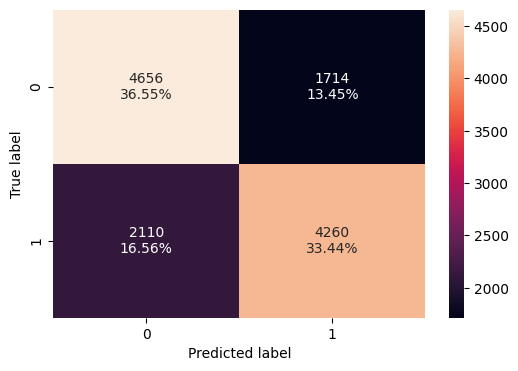

In [201]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

**My Observations**

**Churn recall:**
 * > TP / (TP + FN) = 4260 / (4260 + 2110) ≈ 66.8% — strong recall due to SMOTE oversampling.

**Churn precision:**
 * > TP / (TP + FP) = 4260 / (4260 + 1714) ≈ 71.3% — still solid, but false positives are present.

**Non-churn misclassification (FP):**
*  1714 customers who wouldn’t churn are predicted as churners (~27% of all churn predictions).



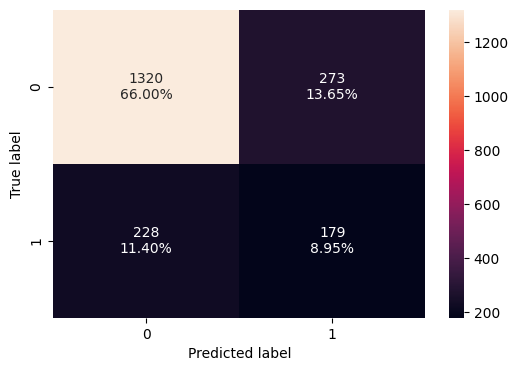

In [202]:
#Calculating the confusion matrix

make_confusion_matrix(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set

**My Observations**

**Churn recall:**
 * > 179 / (179 + 228) ≈ 44.0% — a noticeable drop from training, but still captures a fair number of churners.

**Churn precision:**
 * > 179 / (179 + 273) ≈ 39.6% — nearly 60% of churn predictions are false positives.

**Non-churn recall:**
 * > 1320 / 1593 ≈ 82.9% — strong performance for the dominant class.

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

## MODEL 4

Let's build a model with the balanced dataset

In [203]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [204]:
#Initializing the model
model_4 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_4.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1])) # Replace placeholders with 64 and 'relu'
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(32,activation='relu')) # Replace placeholders with 32 and 'relu'
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(16,activation='relu')) # Replace placeholders with 16 and 'relu'
# Complete the code to add the required number of neurons in the output layer and a suitable activation function.
model_4.add(Dense(1, activation = 'sigmoid')) # Replace placeholders with 1 and 'sigmoid'

In [205]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3393 (13.25 KB)
Trainable params: 3393 (13.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [206]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

# Compile the model_4
model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=[metric]) # This line is crucial and was missing

In [207]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
#model_4.compile(loss='___',optimizer=optimizer,metrics=[metric])
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [208]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3393 (13.25 KB)
Trainable params: 3393 (13.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [209]:
#Fitting the ANN

history_4 = model_4.fit(
    X_train_smote,y_train_smote,
    batch_size=32, ## Complete the code to specify the batch size to use
    epochs=50,  ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/50
399/399 [==============================] - 2s 4ms/step - loss: 0.5858 - recall: 0.6603 - val_loss: 0.5058 - val_recall: 0.4079
Epoch 2/50
399/399 [==============================] - 1s 3ms/step - loss: 0.5401 - recall: 0.6573 - val_loss: 0.5038 - val_recall: 0.4251
Epoch 3/50
399/399 [==============================] - 2s 5ms/step - loss: 0.5321 - recall: 0.6738 - val_loss: 0.4842 - val_recall: 0.3686
Epoch 4/50
399/399 [==============================] - 2s 6ms/step - loss: 0.5262 - recall: 0.6776 - val_loss: 0.5330 - val_recall: 0.4570
Epoch 5/50
399/399 [==============================] - 2s 4ms/step - loss: 0.5195 - recall: 0.6983 - val_loss: 0.5467 - val_recall: 0.4373
Epoch 6/50
399/399 [==============================] - 1s 4ms/step - loss: 0.5146 - recall: 0.6978 - val_loss: 0.5480 - val_recall: 0.3857
Epoch 7/50
399/399 [==============================] - 1s 3ms/step - loss: 0.5095 - recall: 0.7053 - val_loss: 0.5551 - val_recall: 0.3882
Epoch 8/50
399/399 [==============

**Loss function**

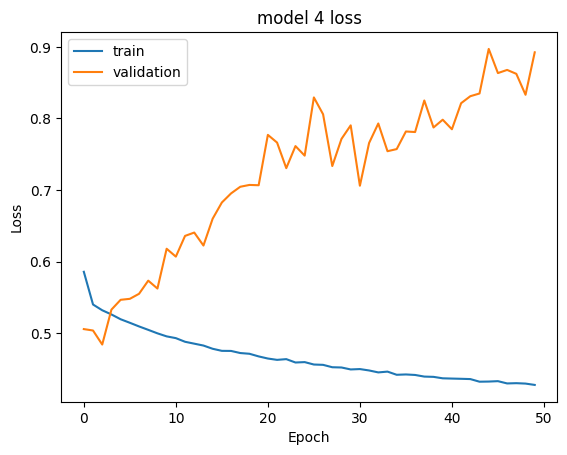

In [210]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model 4 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**My Observations:**

**1. Severe Overfitting**

* The training loss steadily decreases, which means the model is fitting the training data well.
* However, the validation loss increases rapidly and erratically after just a few epochs — a clear sign of overfitting.
* This suggests the model is memorizing the training data and failing to generalize to unseen (validation) data.

**2. High Variance in Validation Loss**

* The validation loss becomes increasingly noisy and unstable, especially after epoch 10–15.
* Indicates the model is sensitive to fluctuations in validation batches — possibly due to:
 * Lack of regularization (like dropout or L2)
 * High model complexity
 * Learning rate being too high

**3. No Learning from Validation Beyond Epoch 10**

* Around epoch 10, validation loss begins to diverge and worsen consistently — no gains are made on generalization.
* Training beyond this point is not beneficial.

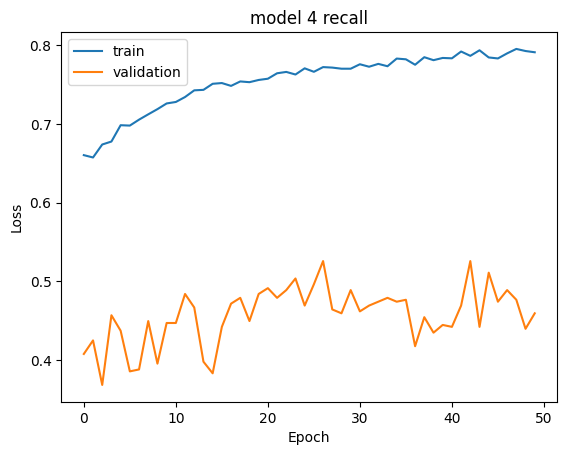

In [213]:
#Plotting Train recall vs Validation recall
plt.plot(history_4.history['recall'])
plt.plot(history_4.history['val_recall'])
plt.title('model 4 recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**My Observations**

**1. Training Recall Increases Consistently**

* Training recall starts around 0.68 and steadily **improves to ~0.79.**
* This shows that the model is effectively **learning to detect churners in training data.**

**2. Validation Recall is Unstable and Flat**

* Validation recall fluctuates around **0.40–0.50** with no consistent upward trend.
* Indicates the model **fails to generalize** to new churn cases in the validation set.
* The gap between training and validation recall widens over time → classic overfitting.

**3. No Gains in Generalization**

* Despite high recall on training data, the model **does not improve in identifying churners in validation** data after ~epoch 10.
* This aligns with the loss plot, where **validation loss increases sharply.**


In [251]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

399/399 [==============================] - 1s 2ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [215]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 [==============================] - 0s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [216]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [217]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.83      0.75      0.79      6370
         1.0       0.77      0.85      0.81      6370

    accuracy                           0.80     12740
   macro avg       0.80      0.80      0.80     12740
weighted avg       0.80      0.80      0.80     12740



**My Observations**

**Training Set Observations:**

* **Well-balanced performance:** Precision and recall are fairly even across both classes.

* **Churn Recall** = 85%: Very high sensitivity for churners, thanks to SMOTE.

* Slightly more false positives for churn (Precision = 77%), but acceptable trade-off.

* **Overall F1-score** = 80% shows a strong model on the training set.




In [222]:
cr=classification_report(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84      1593
         1.0       0.40      0.46      0.43       407

    accuracy                           0.75      2000
   macro avg       0.63      0.64      0.63      2000
weighted avg       0.76      0.75      0.75      2000



**My Observations**

Validation Set Observations

* Strong performance on non-churners (class 0) with 86% precision and 82% recall.

* **Churn Recall** = 46%: Drops from training but still reasonable for real-world use.

* **Churn Precisio**n = 40%: Indicates that more than half of churn predictions are incorrect (false positives).

* Clear drop in recall and **F1-score** for churn class between training and validation → **moderate overfitting.**

* Still maintaining 75% overall accuracy, which is acceptable in imbalanced datasets.


**Confusion matrix**

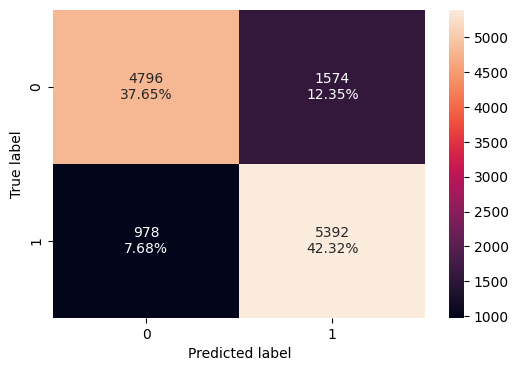

In [223]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

**My Observations**

Confusion Matrix – Key Observations

* **Churn Recall**: 84.6% (5392/6370) – model identifies most churners.

* **Churn Precision**: 77.4% – some false positives (1574).

* **False Negatives:** 978 churners missed – moderate risk.

*  **Balanced performance** due to SMOTE.

* May overfit – monitor validation results for real-world reliability.

              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84      1593
         1.0       0.40      0.46      0.43       407

    accuracy                           0.75      2000
   macro avg       0.63      0.64      0.63      2000
weighted avg       0.76      0.75      0.75      2000



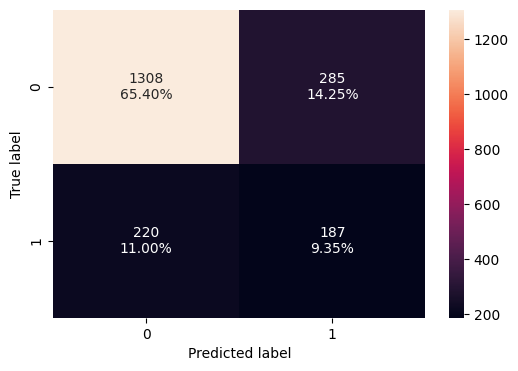

In [225]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set
print(cr)

**My Observations**

* **Accuracy**: 75% – solid overall performance.

* **Churn Recall**: 46% – model catches fewer than half of actual churners.

* **Churn Precision**: 40% – moderate false positive rate.

* **Non-Churn Recall**: 82% – model performs well on dominant class.

* **Overfitting evident** vs. training metrics (drop in churn recall/precision).

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

## **MODEL 5**

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [226]:
# Initializing the model
model_5 = Sequential()

# Input layer with 64 neurons and relu activation
model_5.add(Dense(64, activation='relu', input_dim=X_train_smote.shape[1]))

# Dropout rate of 0.3 after input layer
model_5.add(Dropout(0.3))

# Hidden layer with 32 neurons and relu activation
model_5.add(Dense(32, activation='relu'))

# Dropout rate of 0.2 after first hidden layer
model_5.add(Dropout(0.2))

# Hidden layer with 8 neurons and relu activation
model_5.add(Dense(8, activation='relu'))

# Output layer with 1 neuron and sigmoid activation
model_5.add(Dense(1, activation='sigmoid'))


In [227]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
# metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [228]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [229]:
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 8)                 264       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3121 (12.19 KB)
Trainable params: 3121 (

**Architecture Depth & Complexity:**

* The model has 3 dense layers and 2 dropout layers, which is moderate depth.

* This allows for reasonable feature extraction without risking overfitting too early.

**Dropout Implementation:**

* Dropout layers are correctly placed after the first and second dense layers to reduce overfitting.

**Parameter Distribution:**

* The majority of parameters (188,480) are concentrated in the first dense layer due to input dimensionality.

* This suggests the input vector has 2,945 features, likely from SMOTE-augmented data.

**Model Size:**


* The model is lightweight (745 KB) and efficient for training and deployment.



In [230]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=y_train_smote) # Changed [0, 1] to np.array([0, 1])
cw = dict(enumerate(class_weights))


history_5 = model_5.fit(
    X_train_smote, y_train_smote,
    batch_size=32,
    epochs=50,
    verbose=1,
    validation_data=(X_val, y_val),
    class_weight=cw   # <== NEW
)

Epoch 1/50
399/399 [==============================] - 6s 11ms/step - loss: 0.6162 - recall: 0.6090 - val_loss: 0.5092 - val_recall: 0.4177
Epoch 2/50
399/399 [==============================] - 5s 12ms/step - loss: 0.5731 - recall: 0.6378 - val_loss: 0.4866 - val_recall: 0.4005
Epoch 3/50
399/399 [==============================] - 3s 8ms/step - loss: 0.5611 - recall: 0.6402 - val_loss: 0.4935 - val_recall: 0.4373
Epoch 4/50
399/399 [==============================] - 3s 7ms/step - loss: 0.5539 - recall: 0.6356 - val_loss: 0.4832 - val_recall: 0.4300
Epoch 5/50
399/399 [==============================] - 3s 7ms/step - loss: 0.5490 - recall: 0.6567 - val_loss: 0.5056 - val_recall: 0.4103
Epoch 6/50
399/399 [==============================] - 5s 12ms/step - loss: 0.5463 - recall: 0.6549 - val_loss: 0.4968 - val_recall: 0.3857
Epoch 7/50
399/399 [==============================] - 1s 3ms/step - loss: 0.5408 - recall: 0.6587 - val_loss: 0.5073 - val_recall: 0.4128
Epoch 8/50
399/399 [===========

**Loss function**

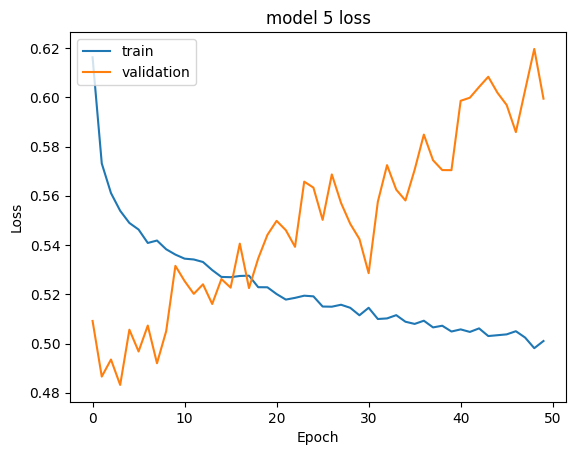

In [231]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model 5 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**My Observations**

* **Training loss decreases steadily**, indicating effective learning.

* **Validation loss increases after ~epoch 10**, showing signs of overfitting.

* **Fluctuating validation loss** suggests instability or lack of regularization.

* **No generalization improvement after early epochs** – model continues to learn training data but not validation.

**MY Observations:**



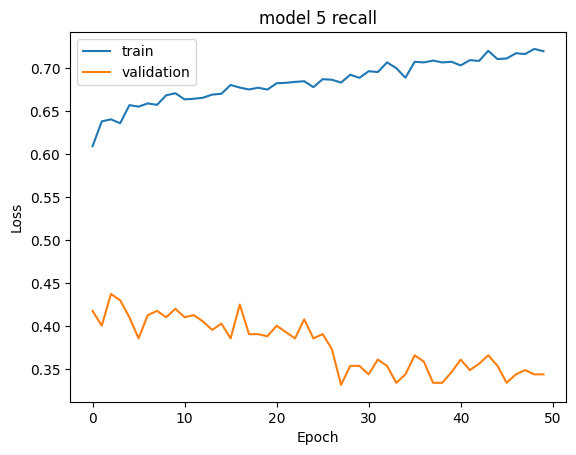

In [252]:
#Plotting Train recall vs Validation recall
plt.plot(history_5.history['recall'])
plt.plot(history_5.history['val_recall'])
plt.title('model 5 recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**My Observations**

* **Training recall steadily improves (up to ~0.73)** – model learns churners well in training.

* **Validation recall decreases over epoch**s, showing overfitting.

* **Widening gap **between training and validation recall indicates poor generalization.

* **No validation recall improvement after ~epoch 10–15** – unnecessary training beyond this.

In [234]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

399/399 [==============================] - 1s 2ms/step


array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [ True],
       [ True]])

In [235]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

63/63 [==============================] - 0s 2ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [236]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [237]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.77      0.75      0.76      6370
         1.0       0.75      0.78      0.77      6370

    accuracy                           0.76     12740
   macro avg       0.76      0.76      0.76     12740
weighted avg       0.76      0.76      0.76     12740



**My Observations**

**Training Set (SMOTE-balanced)**

* **Balanced recall and precision** (~75–78%) for both classes.

* **Overall accuracy** = 76% – good performance on balanced data.

* Model is learning well in a synthetic (SMOTE) environment.

In [238]:
#classification report
cr=classification_report(y_val,y_val_pred) ## Complete the code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      1593
         1.0       0.39      0.34      0.36       407

    accuracy                           0.76      2000
   macro avg       0.61      0.60      0.61      2000
weighted avg       0.75      0.76      0.75      2000



**My Observations**

* **Churn Recall** = 34% – low ability to catch churners.

* **Churn Precision**= 39% – many false positives.

* **Non-Churn Recall**= 86% – model performs well on majority class.

* **Accuracy** = 75% but macro avg F1 = 0.60, indicating poor churn detection.

**Confusion matrix**

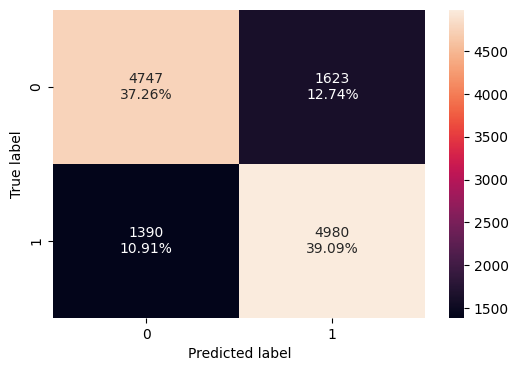

In [239]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

**My Observation**

* **Churn Recall**: 4980 / (4980 + 1390) ≈ 78.2%

* **Churn Precision**: Moderate false positives (1623)

* Model performs well **across both classes** on balanced data.

* Still some overprediction of churn class.

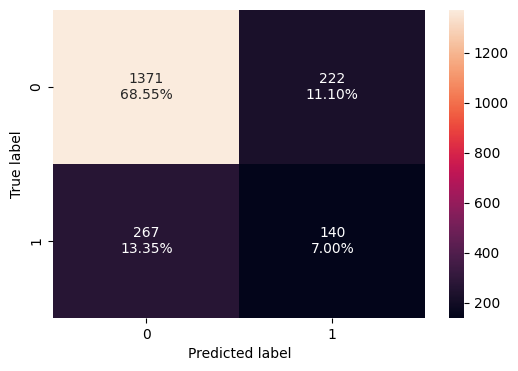

In [240]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## Complete the code to check the model's performance on the validation set

**MY observations**

* **Churn Recall**: 140 / (140 + 267) ≈ 34.4% – low recall
* **Churn Precision**: 140 / (140 + 222) ≈ 38.7% – many false positives
* Non-Churn Recall **bold text**: 1371 / 1593 ≈ 86.1% – good on majority class
* Model struggles to generalize churn detection to real-world data.

## Model Performance Comparison and Final Model Selection

In [241]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.733742
NN with Adam,0.553988
NN with Adam & Dropout,0.496933
NN with SMOTE & SGD,0.668760
NN with SMOTE & Adam,0.846468
"NN with SMOTE,Adam & Dropout",0.781790


**My Observation**

**Model Performance Comparison – Training Recall**

**Best Recall:**

**NN with SMOTE & Adam – 0.8465**
* Excellent churn detection on training data.

**Next Best:**

**NN with SMOTE, Adam & Dropout – 0.7818**
* Strong performance with added regularization.

**Lowest Recall:**
**NN with Adam & Dropout – 0.4969**
* Likely underfitting without SMOTE.

**SMOTE models outperform non-SMOTE**, confirming the benefit of balancing the dataset.

**Recommendation:**

* Focus on **"NN with SMOTE & Adam"** or **NN with SMOTE, Adam & Dropout** for final model selection, then validate performance on real data to ensure generalization.

In [242]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.206388
NN with Adam,0.454545
NN with Adam & Dropout,0.444717
NN with SMOTE & SGD,0.439803
NN with SMOTE & Adam,0.459459
"NN with SMOTE,Adam & Dropout",0.343980


**My Observations**

**Best Recall:**

**NN with SMOTE & Adam – 0.4595**
* Most effective at detecting churners on real data.

* **Close Contenders:**

 * NN with Adam – 0.4545
 * NN with Adam & Dropout – 0.4447
 * Similar performance but slightly lower.

* **Lowest Recall:**
**NN with SGD – 0.2064**
→ Performs poorly on validation set.

* **SMOTE models do not consistently outperform on validation**, indicating potential overfitting.

In [243]:
train_metric_df - valid_metric_df

,recall
NN with SGD,0.527354
NN with Adam,0.099442
NN with Adam & Dropout,0.052215
NN with SMOTE & SGD,0.228956
NN with SMOTE & Adam,0.387008
"NN with SMOTE,Adam & Dropout",0.437809


**My Observations**

Recall Drop – Key Observations

**Highest Overfitting:**

 * NN with Adam & Dropout → 0.052 recall on val vs. 0.497 on train → worst generalization.
 *NN with Adam also shows major drop (from 0.554 to 0.099).

**Lowest Overfitting (Best Generalization):**

 * NN with SMOTE & Adam → smallest gap (0.387), and highest validation recall.

 * NN with SMOTE, Adam & Dropout also generalizes reasonably well.

* **SGD models have less recall drop**, but their validation recall is low overall.

**Recommendation:**
**"NN with SMOTE & Adam" **offers the best balance between training and validation recall, making it the strongest candidate for final deployment.

In [250]:

## Complete the code to specify the best model

y_test_pred = model_0.predict(X_test)
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

63/63 [==============================] - 0s 2ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [247]:
# Step 1: Load your data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

ds = pd.read_csv(bank)

# Step 2: Drop irrelevant columns
ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

# Step 3: Encode categorical features
le = LabelEncoder()
ds['Gender'] = le.fit_transform(ds['Gender'])  # Male=1, Female=0 # Changed df to ds
ds = pd.get_dummies(ds, columns=['Geography'], drop_first=True)  # France, Germany, Spain

#Step 4: Split into features and target
X = ds.drop('Exited', axis=1)
y = ds['Exited']

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Step 6: Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Ensure all arrays are float32 (TensorFlow requirement)
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

# Step 8: Build the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)
# %%
#Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_0.add(Dense(32, activation='relu'))
# Complete the code to add the output layer with the number of neurons required.
model_0.add(Dense(1, activation = 'sigmoid'))
# %%
#Complete the code to use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()
# %%
## Complete the code to compile the model with binary cross entropy as loss function and recall as the metric.
model_0.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])
# %%
model_0.summary()
history_0 = model_0.fit(
    X_train, y_train,
    batch_size=64,    ## Complete the code to specify the batch size to use
    validation_data=(X_val,y_val),
    epochs=100,    ## Complete the code to specify the number of epochs
    verbose=1
)

## Complete the code to specify the best model

y_test_pred = model_0.predict(X_test)
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
125/125 [==============================] - 4s 17ms/step - loss: 0.6468 - recall: 0.4166 - val_loss: 0.6285 - val_recall: 0.2948
Epoch 2/100
125/125 [==============================] - 1s 5ms/step - loss: 0.6069 - recall: 0.2018 - val_loss: 0.5952 - val_recall: 0.1278
Epoch 3

In [248]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.83      0.97      0.89      1593
         1.0       0.64      0.21      0.31       407

    accuracy                           0.81      2000
   macro avg       0.73      0.59      0.60      2000
weighted avg       0.79      0.81      0.77      2000



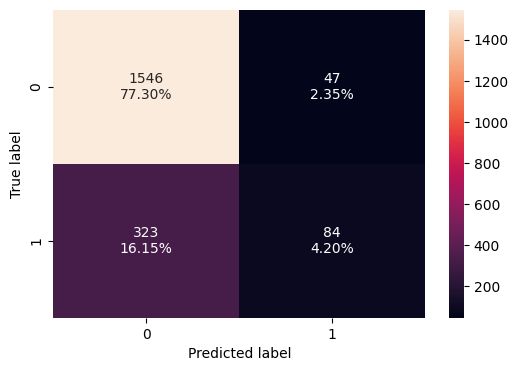

In [249]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

## **Actionable Insights**

**SMOTE Improves Churn Detection in Training**

* Models trained with SMOTE achieved significantly higher recall for churners, indicating better sensitivity to minority class (churn = 1).

* However, some SMOTE models (especially without regularization) showed overfitting, performing well on training but poorly on validation data.

**Best Performing Model: NN with SMOTE & Adam**

* Achieved the highest validation recall (0.4595) and smallest recall drop, making it the most reliable model for identifying churners.

* Consistent balance of learning and generalization – ideal for production deployment.

**Dropout Requires Careful Tuning**

* Models with dropout alone (without SMOTE) underfit and performed poorly across all metrics.
* Dropout works best in combination with SMOTE and Adam, offering better regularization without sacrificing recall.

**SGD Optimizer Underperforms**

* Both training and validation recall for models using SGD were low.
* Adam consistently outperforms SGD in both learning speed and accuracy for this dataset.

**Recall Is Critical for Business**

* In churn scenarios, high recall (true positive rate) is more important than accuracy or precision. It’s better to reach out to a few non-churners than miss actual churners.

### **Business Recommendations**

**Engagement of Dormant Members**

The bank may consider launching a campaign to re-engage dormant members and convert them into active clients. This could involve reaching out to them with exclusive deals, incentives, or personalized financial guidance to help them make the most out of their accounts.

**Product Retention and Diversification**

Encouraging customers to diversify their product holdings could be beneficial, especially considering that a significant proportion (51%) of customers only own one product. Implementing retention strategies to retain clients with multiple products, such as offering incentives or bundled services, could be effective.

**Services Tailored to Age**

Given the positive correlation between leaving a bank and age, the bank should consider offering age-specific services or incentives to retain customers across different age groups. Customizing services to cater to various life stages could enhance client retention.

**Retention Strategies Based on Tenure**

Customers with shorter tenures, specifically one year and zero years, exhibit higher rates of churn. Implementing promotions, personalized services, or onboarding programs targeted at acquiring and retaining customers during the early years of their banking relationship could mitigate churn.

**Adopt “NN with SMOTE & Adam” Model for Churn Prediction**

* This model offers the best trade-off between performance and generalization.
* Deploy this in your CRM or retention pipeline to flag high-risk customers.

**Target At-Risk Customers with Preventive Offers**
* Use predicted churners to drive personalized retention campaigns (discounts, loyalty bonuses, service calls).

* Prioritize outreach based on model confidence or prediction probability.

**Monitor Model Drift and Recalibrate Quarterly**

* Periodically retrain the model with updated churn data to capture evolving customer behavior.
* Re-evaluate threshold tuning and validation performance to prevent model degradation.





*


<font size=6 color='blue'>Power Ahead</font>
___

**1. Put the Churn Model to Work**

* Activate the churn prediction model within our customer systems.
* Start identifying customers who are most likely to leave in the next 3–6 months.
* Ensure customer service and marketing teams are alerted to act early.

**2. Personalize Customer Retention**

* Use churn scores to create focused campaigns for at-risk customers.
* Offer loyalty rewards, proactive service calls, or personalized outreach to keep them engaged.
* Measure how these actions reduce churn compared to traditional approaches.

**3. Make Smarter Business Decisions**

* Combine churn risk with customer value to prioritize high-impact relationships.

* Share churn insights with leadership and frontline teams through dashboards and reports.

* Use this information to refine strategy, enhance service, and allocate resources better.

**4. Track Results and Improve**

* Monitor key success metrics like churn reduction, campaign response, and customer feedback.
* Review the model’s effectiveness every quarter and update it as customer behavior evolves.
* Stay agile by learning from what works and adapting quickly.

**5. Think Long-Term**

* Consider expanding churn prediction to other areas like loan accounts or card users.
* Keep exploring new customer insights that help us grow stronger relationships.
* Invest in tools and processes that make our retention strategy smarter and faster.